In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [2]:
cols = ['fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist','class']

In [3]:
df = pd.read_csv('magic04.data', names = cols)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [4]:
df['class'] = (df['class'] == "g").astype(int)

In [5]:
df.describe()

fLength        fWidth         fSize         fConc        fConc1  \
count  19020.000000  19020.000000  19020.000000  19020.000000  19020.000000   
mean      53.250154     22.180966      2.825017      0.380327      0.214657   
std       42.364855     18.346056      0.472599      0.182813      0.110511   
min        4.283500      0.000000      1.941300      0.013100      0.000300   
25%       24.336000     11.863800      2.477100      0.235800      0.128475   
50%       37.147700     17.139900      2.739600      0.354150      0.196500   
75%       70.122175     24.739475      3.101600      0.503700      0.285225   
max      334.177000    256.382000      5.323300      0.893000      0.675200   

              fAsym       fM3Long      fM3Trans        fAlpha         fDist  \
count  19020.000000  19020.000000  19020.000000  19020.000000  19020.000000   
mean      -4.331745     10.545545      0.249726     27.645707    193.818026   
std       59.206062     51.000118     20.827439     26.103621     74.731787   
min     -457.916100   -331.780000   -205.894700      0.000000      1.282600   
25%      -20.586550    -12.842775    -10.849375      5.547925    142.492250   
50%        4.013050     15.314100      0.666200     17.679500    191.851450   
75%       24.063700     35.837800     10.946425     45.883550    240.563825   
max      575.240700    238.321000    179.851000     90.000000    495.561000   

              class  
count  19020.000000  
mean       0.648370  
std        0.477492  
min        0.000000  
25%        0.000000  
50%        1.000000  
75%        1.000000  
max        1.000000

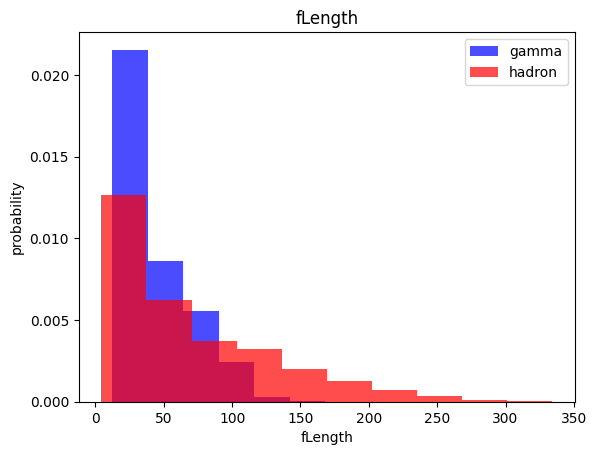

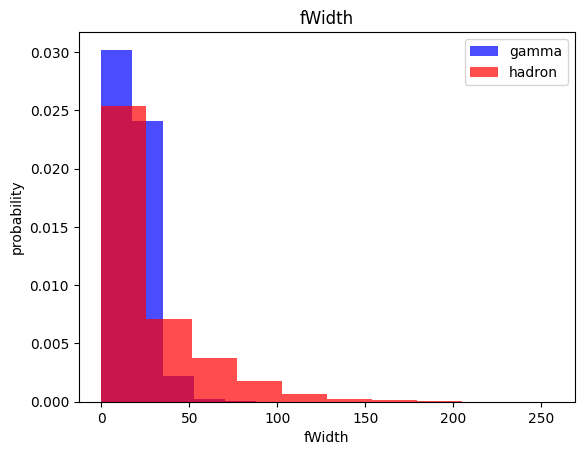

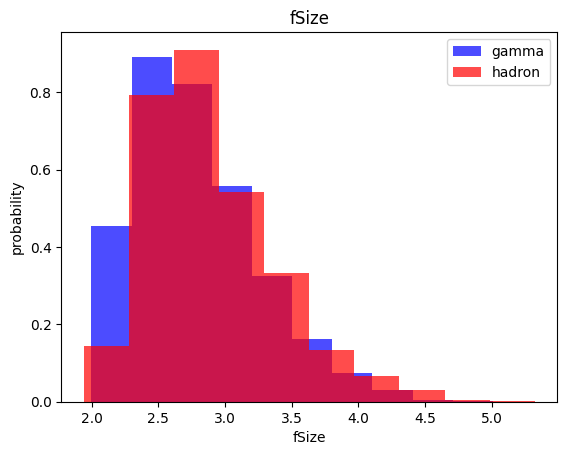

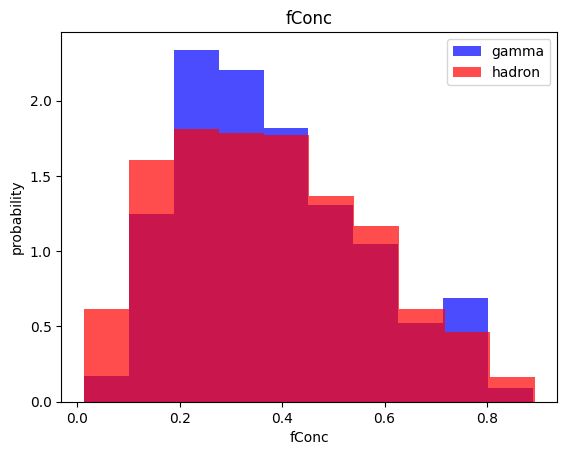

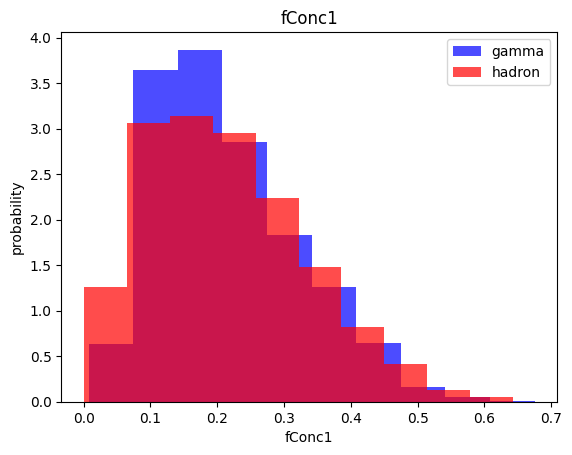

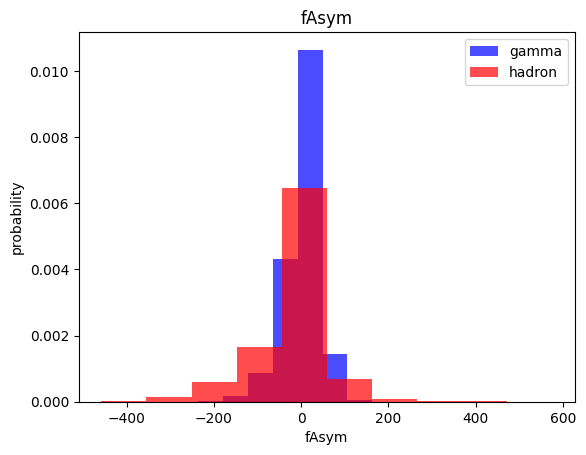

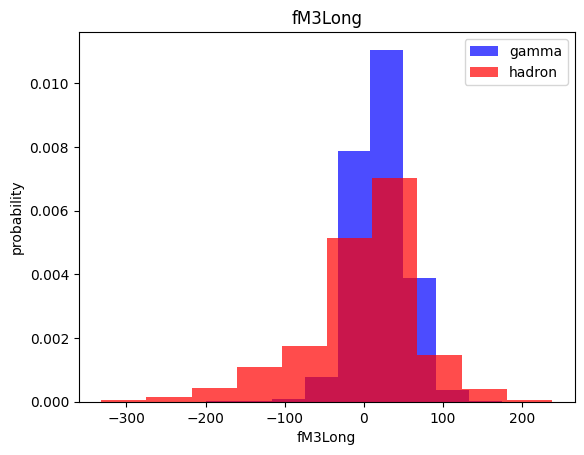

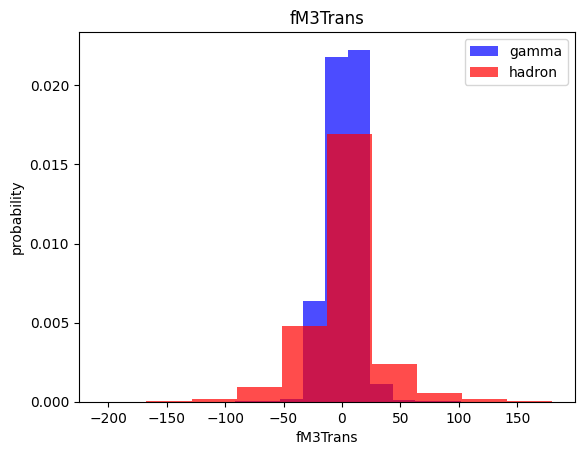

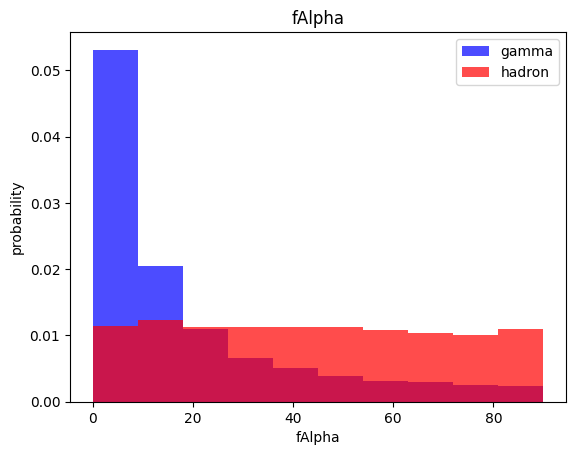

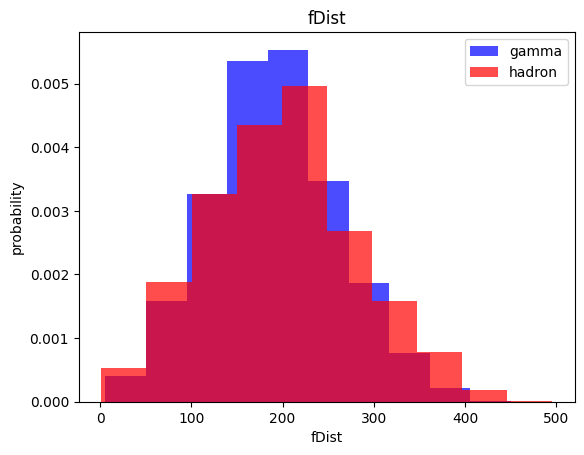

In [6]:
for label in cols[:-1]:
  plt.hist(df[df['class']==1][label], color = 'blue', label = 'gamma', alpha =0.7, density=True)
  plt.hist(df[df['class']==0][label], color = 'red', label = 'hadron', alpha =0.7, density=True)
  plt.title(label)
  plt.ylabel("probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [7]:
train, valid, test = np.split(df.sample(frac=1), [int(0.70*len(df)), int(0.85*len(df))])

In [8]:
print(len(train[train['class']==1]))
print(len(train[train['class']==0]))

8577
4737


In [9]:
def scale_data(dataframe, oversample = False):
  X= dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  if oversample:
    ros = RandomOverSampler()
    X,y = ros.fit_resample(X,y)

  scaler = StandardScaler()
  X = scaler.fit_transform(X)
  data = np.hstack((X,np.reshape(y,(-1,1))))
  return data, X, y

In [10]:
train, X_train, y_train = scale_data(train, oversample = True)
valid, X_valid, y_valid = scale_data(valid, oversample = False)
test, X_test, y_test = scale_data(test, oversample = False)

In [11]:
print(len(y_train))

17154


In [12]:
print(sum(y_train == 1))
print(sum(y_train == 0))

8577
8577


kNN

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [14]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [15]:
y_pred = knn_model.predict(X_test)

In [16]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.77      0.69      0.73      1114
           1       0.82      0.87      0.84      1739

    accuracy                           0.80      2853
   macro avg       0.80      0.78      0.79      2853
weighted avg       0.80      0.80      0.80      2853



Naive Bayes

In [17]:
from sklearn.naive_bayes import GaussianNB

In [18]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train,y_train)

In [19]:
y_pred = nb_model.predict(X_test)

In [20]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.45      0.62      0.52       727
           1       0.85      0.74      0.79      2126

    accuracy                           0.71      2853
   macro avg       0.65      0.68      0.66      2853
weighted avg       0.75      0.71      0.73      2853



Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train,y_train)

In [23]:
y_pred = lg_model.predict(X_test)

In [24]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.79      0.63      0.70      1250
           1       0.75      0.87      0.81      1603

    accuracy                           0.77      2853
   macro avg       0.77      0.75      0.75      2853
weighted avg       0.77      0.77      0.76      2853



Support Vector Machines

In [25]:
from sklearn.svm import SVC

In [26]:
svc_model = SVC()
svc_model = svc_model.fit(X_train,y_train)

In [27]:
y_pred = svc_model.predict(X_test)

In [28]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.85      0.73      0.79      1163
           1       0.83      0.91      0.87      1690

    accuracy                           0.84      2853
   macro avg       0.84      0.82      0.83      2853
weighted avg       0.84      0.84      0.84      2853



Neural Network

In [29]:
import tensorflow as tf

In [30]:
def plot_history(history):
  fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,8))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary_CrossEntorpy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show

In [31]:
def train_model(X_train,y_train,num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(1, activation='sigmoid')
  ])
  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr),loss='binary_crossentropy',metrics=['accuracy'])
  history = nn_model.fit(X_train,y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)
  return nn_model, history

16 nodes, dropout 0, lr 0.01, batch size 32
90/90 [==============================] - 0s 1ms/step - loss: 0.3767 - accuracy: 0.8514
16 nodes, dropout 0, lr 0.01, batch size 64
90/90 [==============================] - 0s 1ms/step - loss: 0.4259 - accuracy: 0.8349
16 nodes, dropout 0, lr 0.01, batch size 128
90/90 [==============================] - 0s 4ms/step - loss: 0.3641 - accuracy: 0.8566
16 nodes, dropout 0, lr 0.005, batch size 32
90/90 [==============================] - 0s 1ms/step - loss: 0.3659 - accuracy: 0.8531
16 nodes, dropout 0, lr 0.005, batch size 64
90/90 [==============================] - 0s 1ms/step - loss: 0.3994 - accuracy: 0.8419
16 nodes, dropout 0, lr 0.005, batch size 128
90/90 [==============================] - 0s 1ms/step - loss: 0.4185 - accuracy: 0.8381
16 nodes, dropout 0, lr 0.001, batch size 32
90/90 [==============================] - 0s 1ms/step - loss: 0.3483 - accuracy: 0.8587
16 nodes, dropout 0, lr 0.001, batch size 64
90/90 [=========================

<ipython-input-30-253beaa4b6c3>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,8))


90/90 [==============================] - 0s 2ms/step - loss: 0.4398 - accuracy: 0.8349
32 nodes, dropout 0, lr 0.005, batch size 32
90/90 [==============================] - 0s 2ms/step - loss: 0.4298 - accuracy: 0.8451
32 nodes, dropout 0, lr 0.005, batch size 64
90/90 [==============================] - 0s 2ms/step - loss: 0.4670 - accuracy: 0.8240
32 nodes, dropout 0, lr 0.005, batch size 128
90/90 [==============================] - 0s 1ms/step - loss: 0.4215 - accuracy: 0.8419
32 nodes, dropout 0, lr 0.001, batch size 32
90/90 [==============================] - 0s 2ms/step - loss: 0.3624 - accuracy: 0.8566
32 nodes, dropout 0, lr 0.001, batch size 64
90/90 [==============================] - 0s 1ms/step - loss: 0.3924 - accuracy: 0.8388
32 nodes, dropout 0, lr 0.001, batch size 128
90/90 [==============================] - 0s 2ms/step - loss: 0.3424 - accuracy: 0.8559
32 nodes, dropout 0.2, lr 0.01, batch size 32
90/90 [==============================] - 0s 1ms/step - loss: 0.3598 - acc

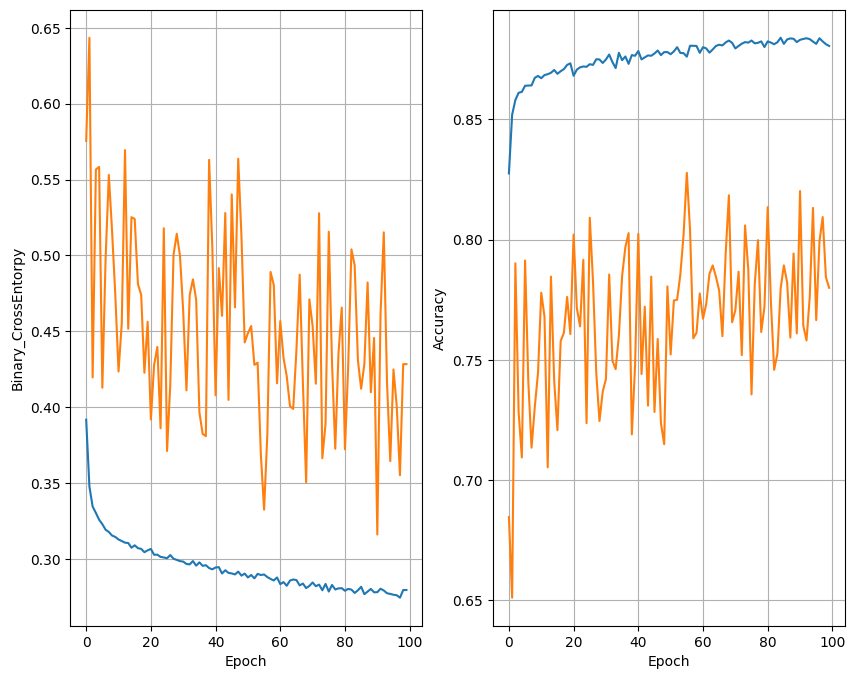

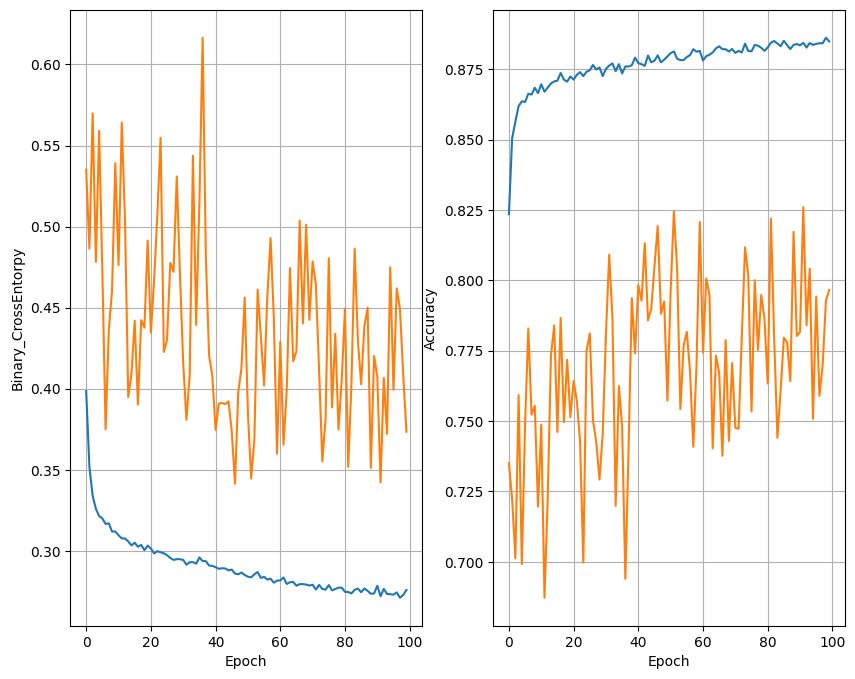

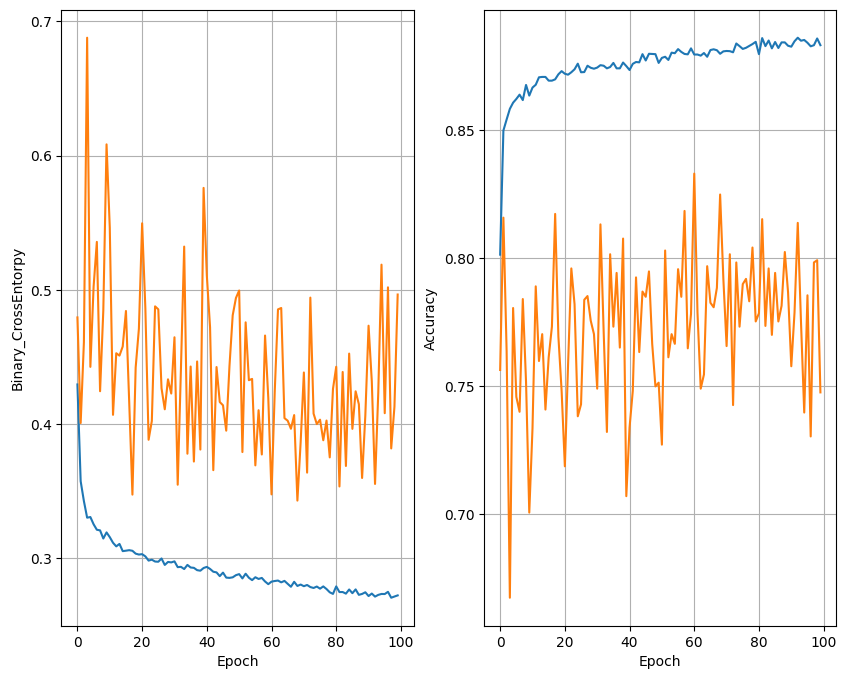

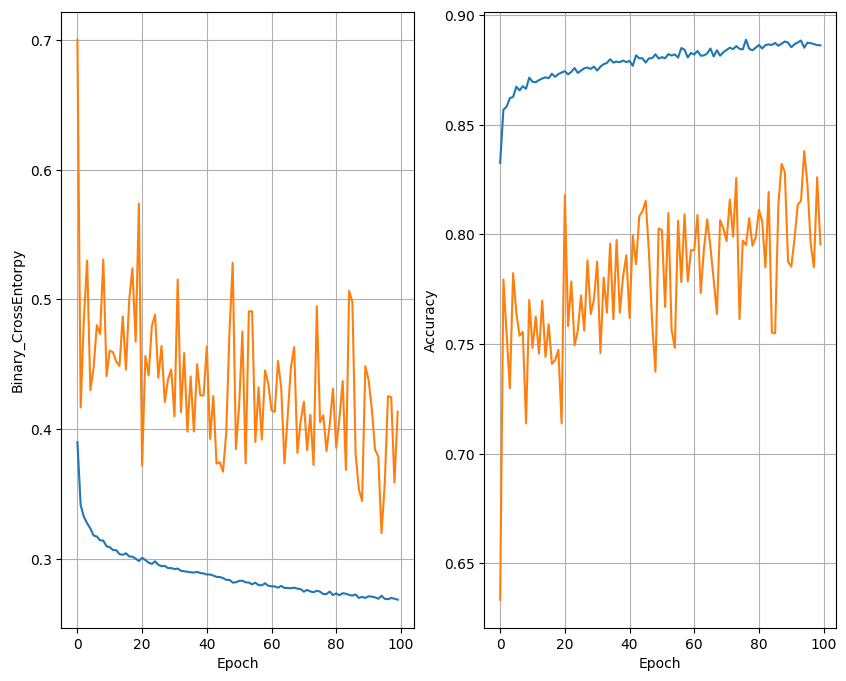

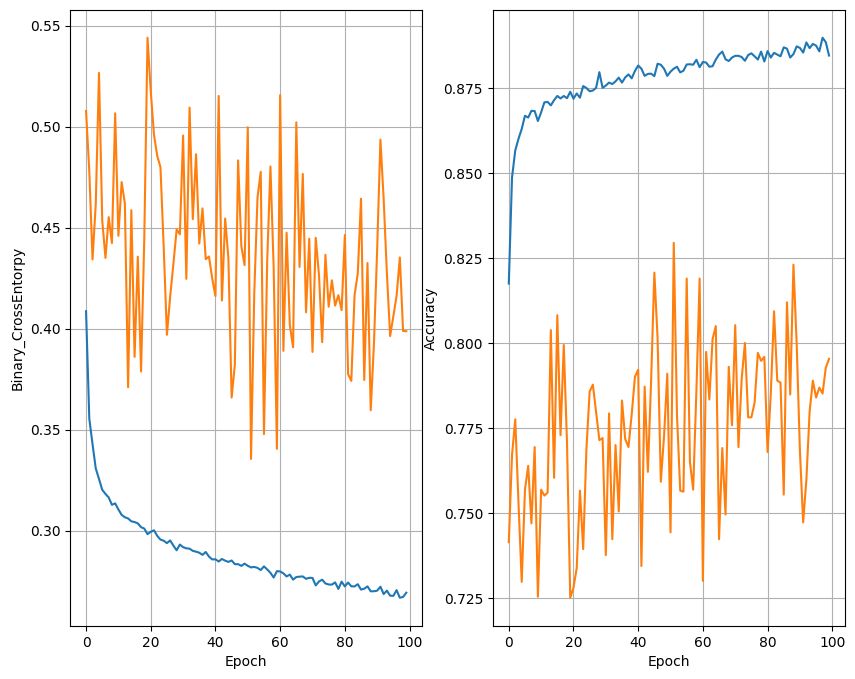

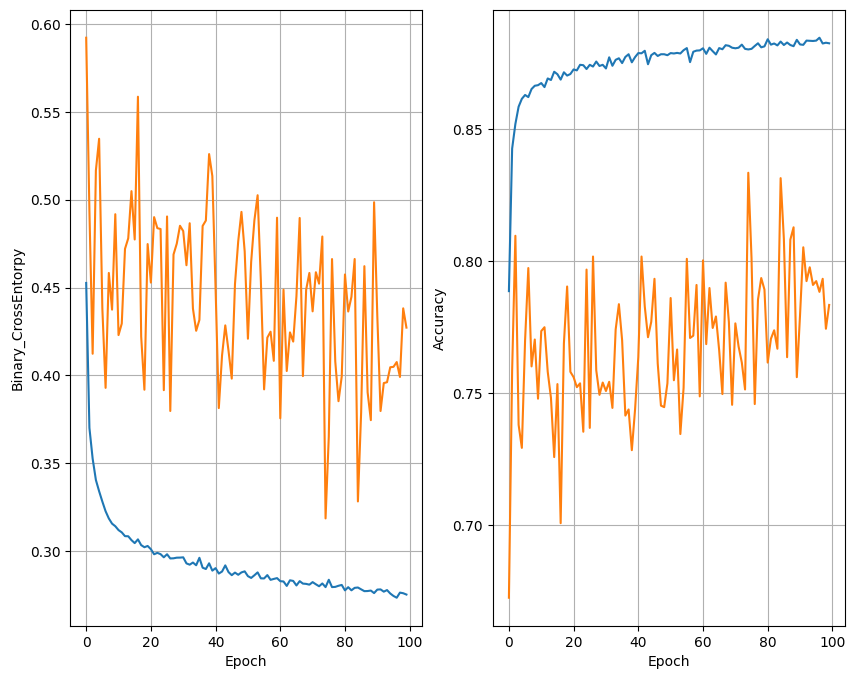

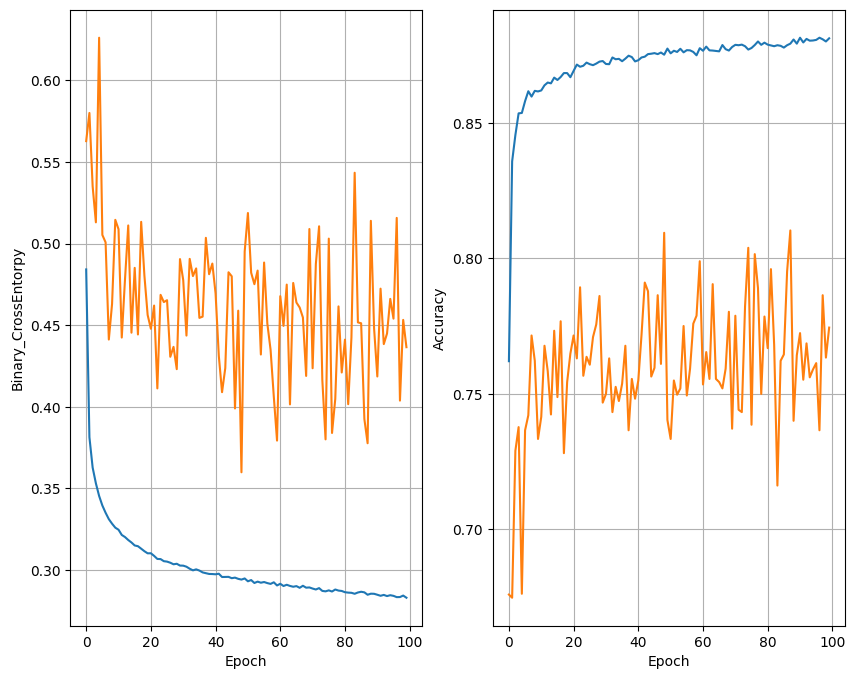

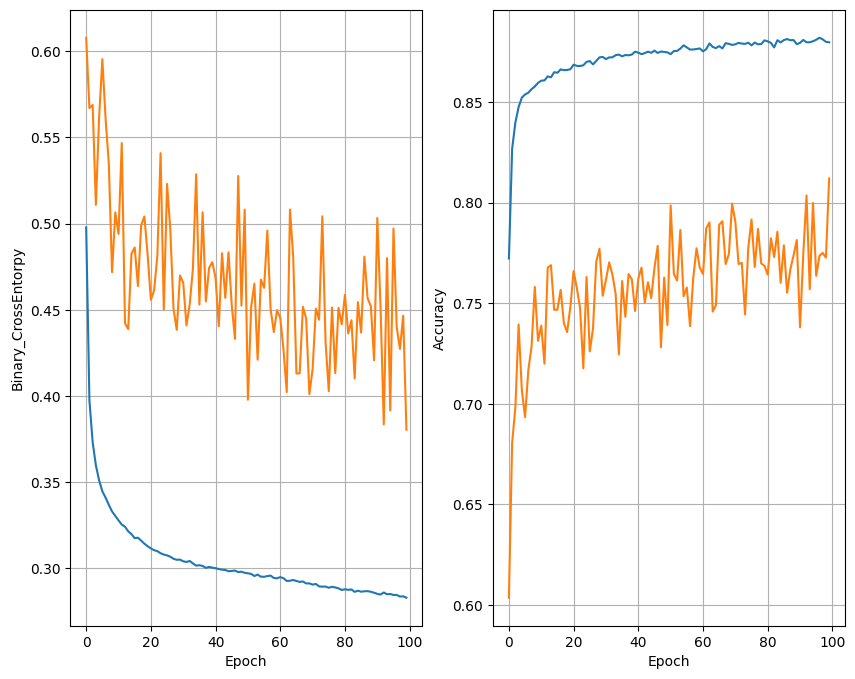

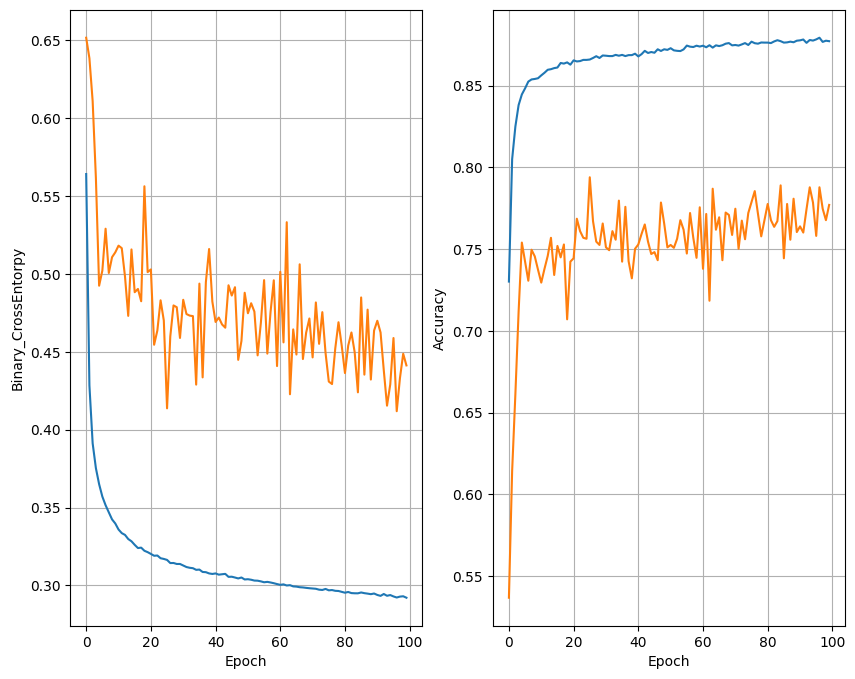

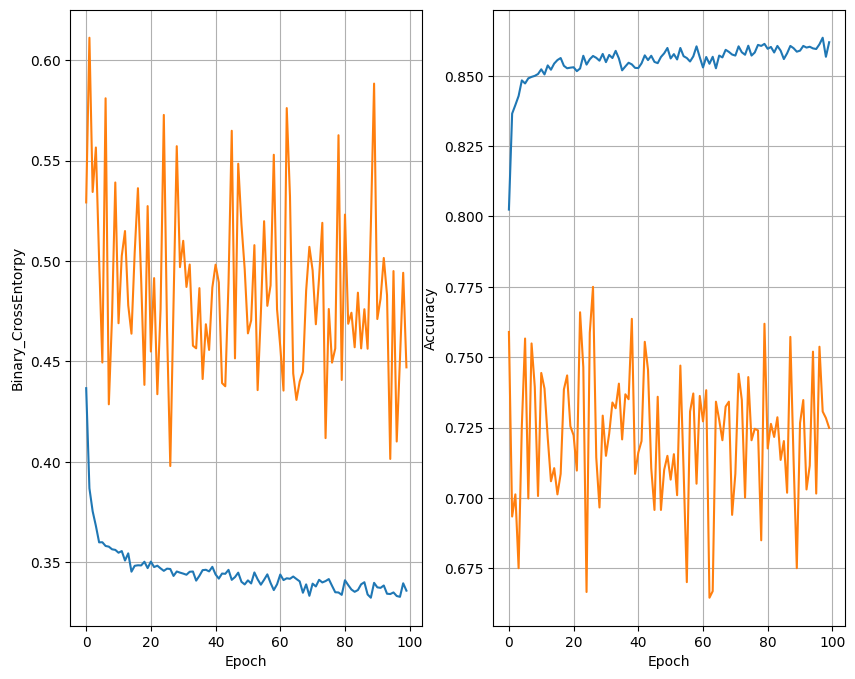

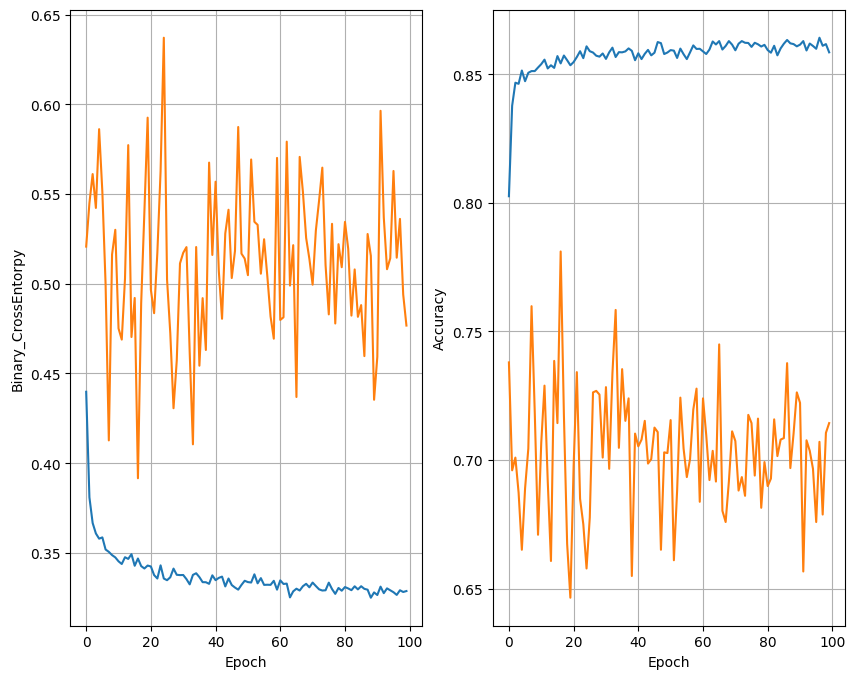

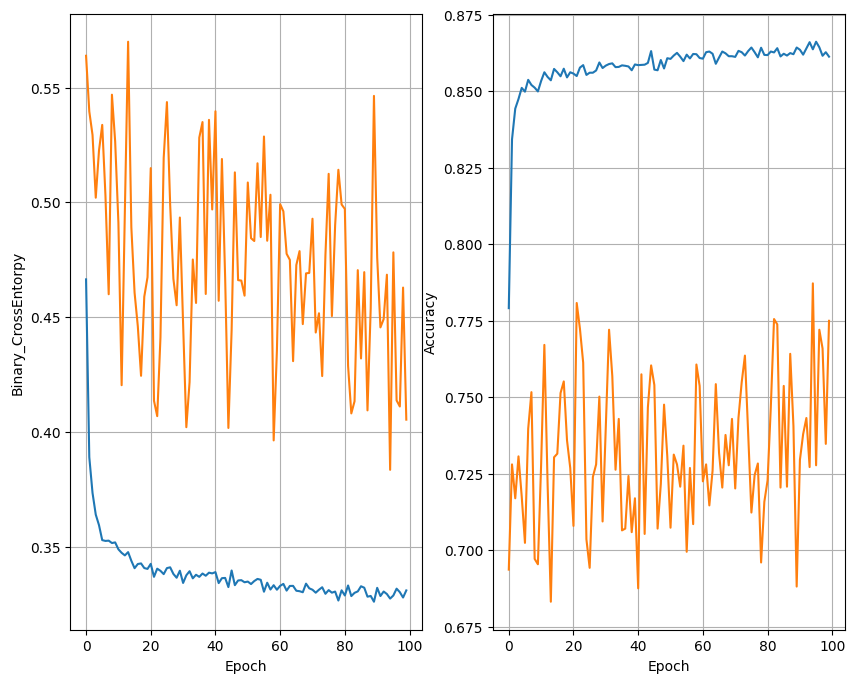

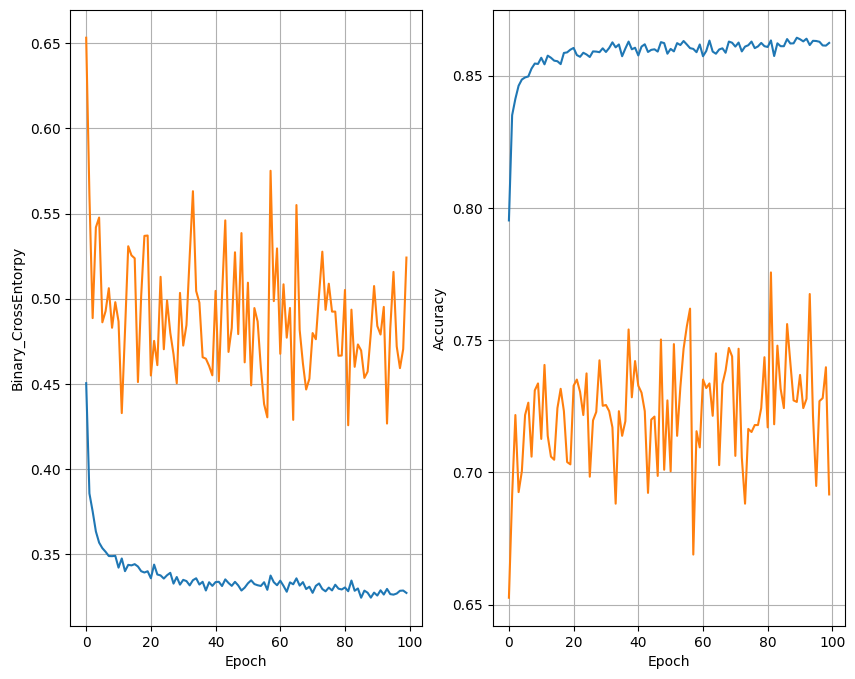

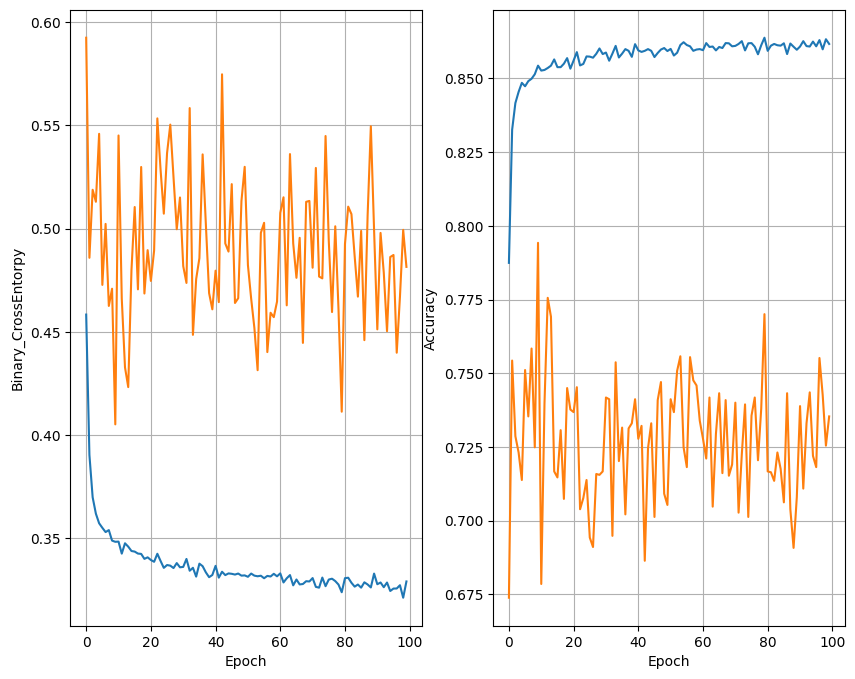

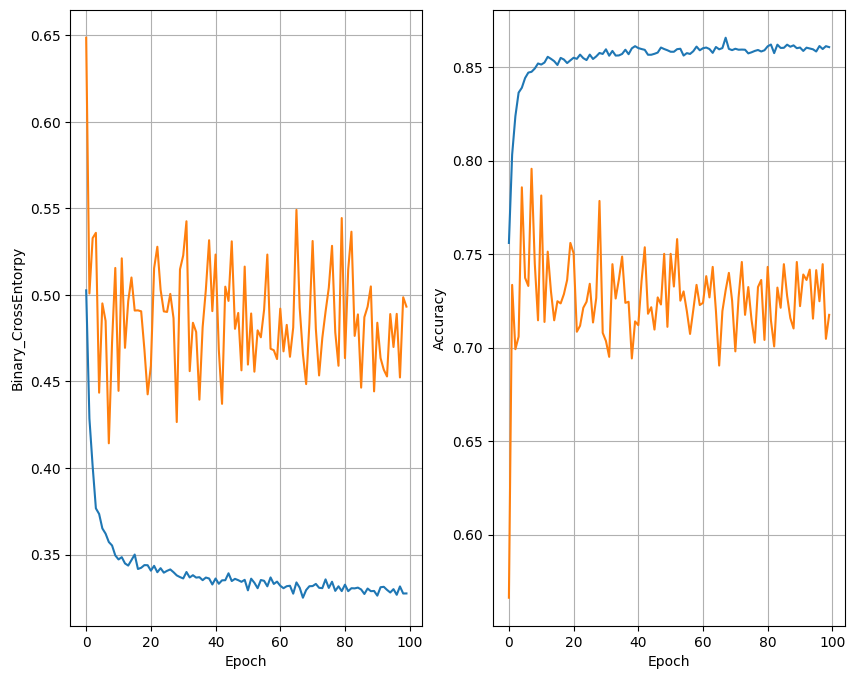

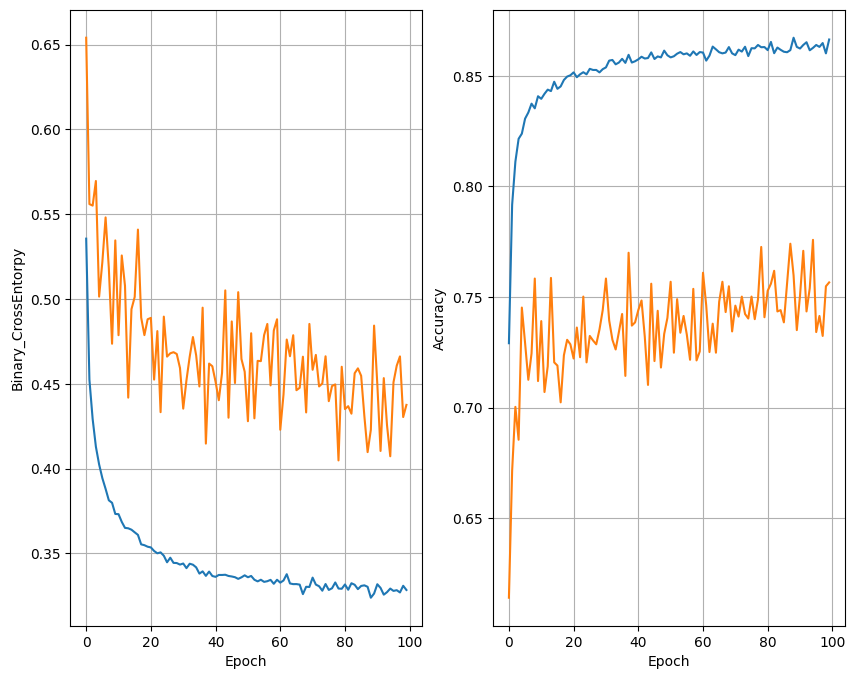

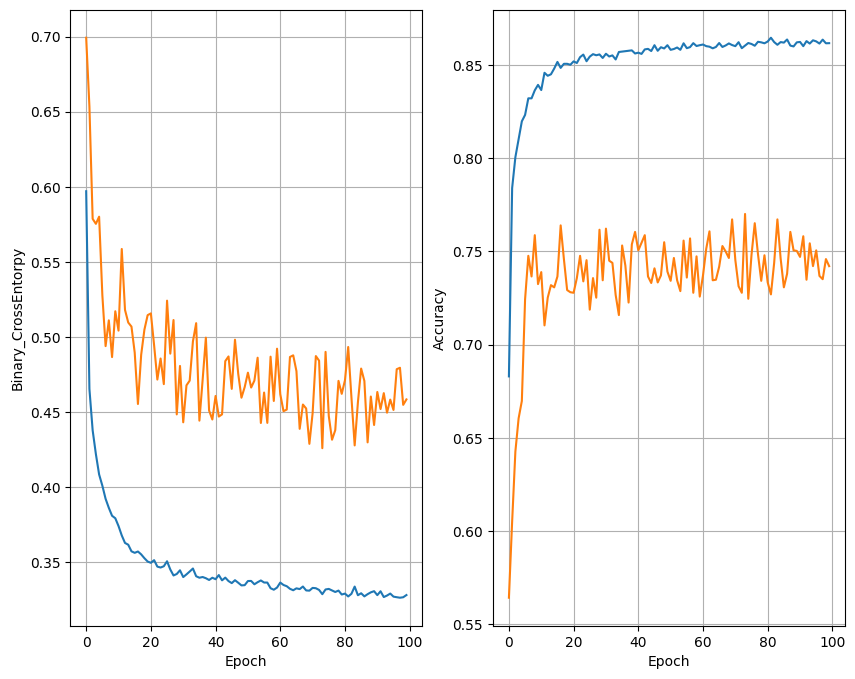

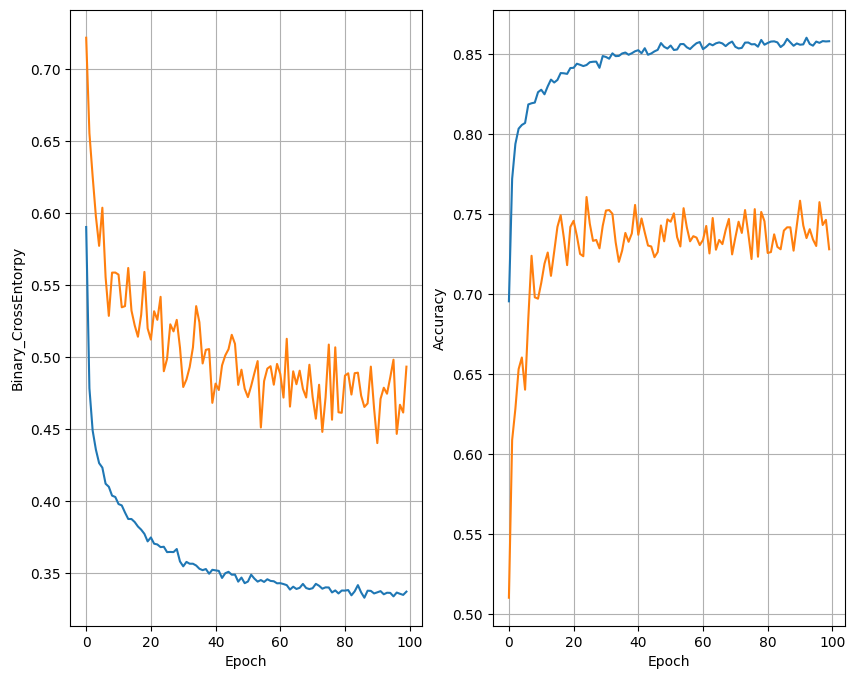

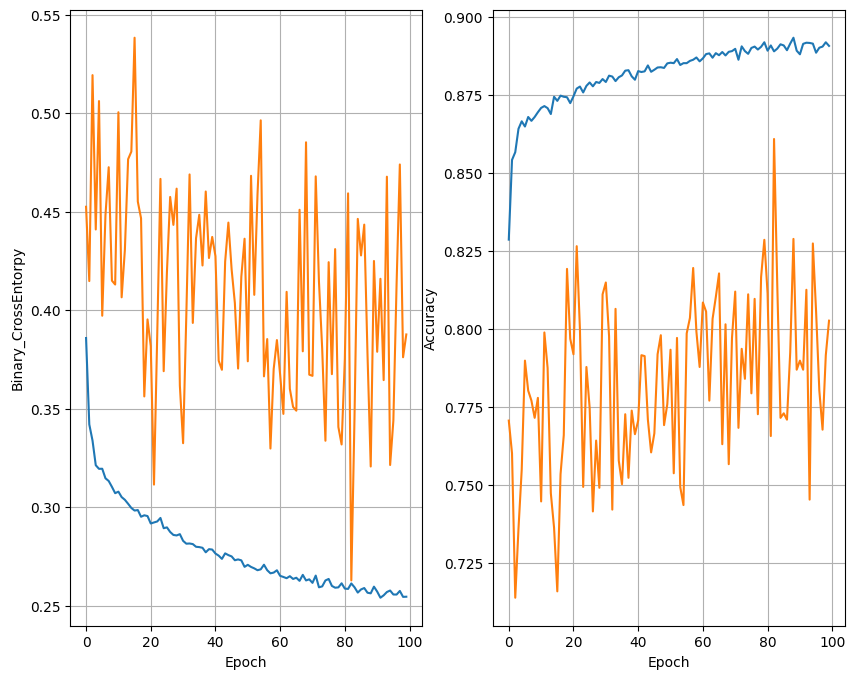

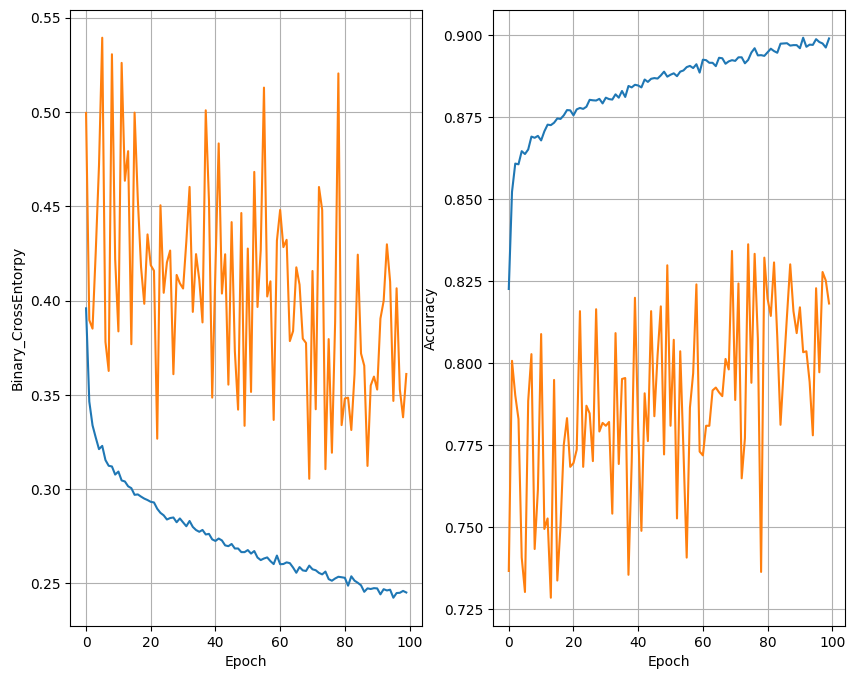

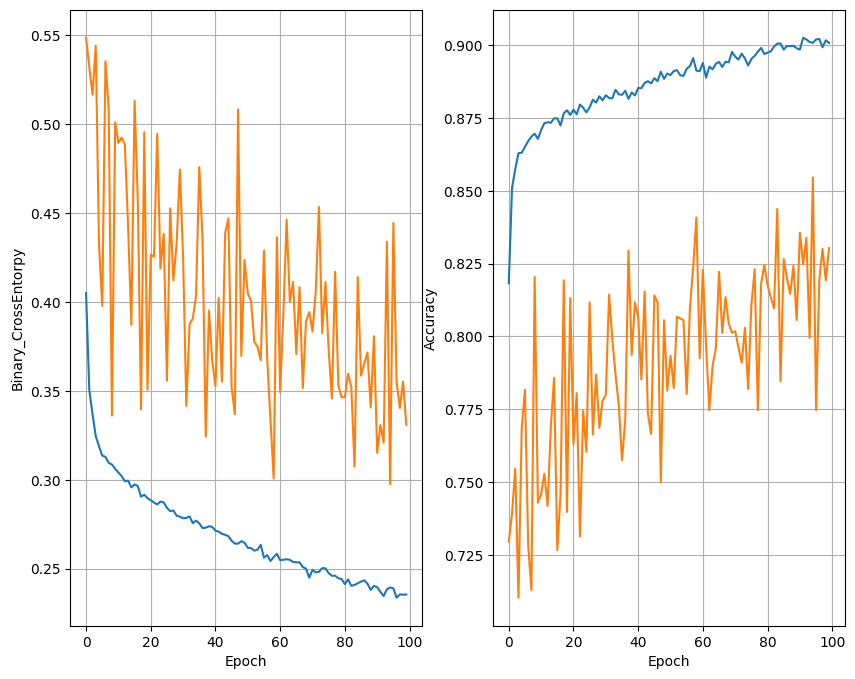

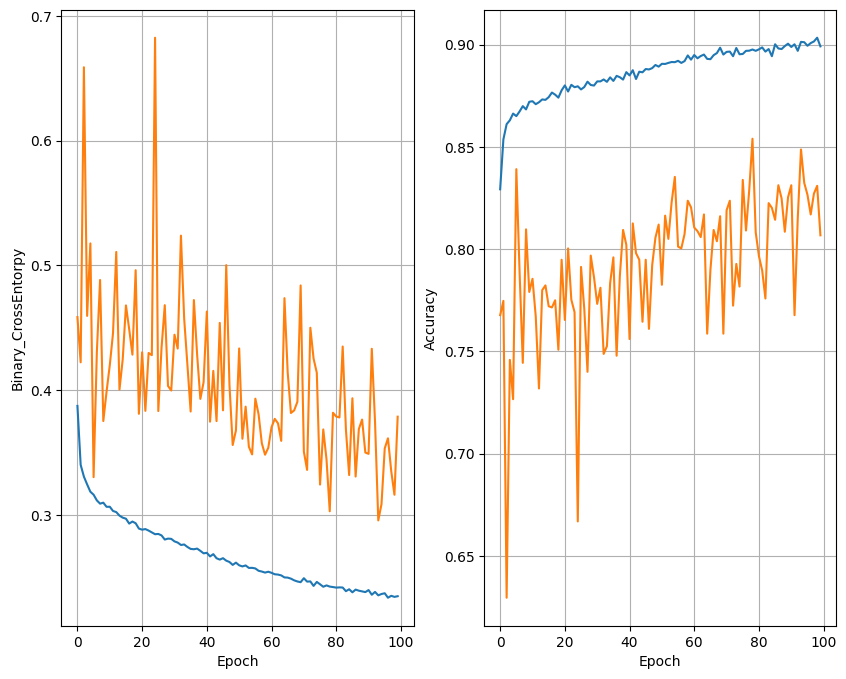

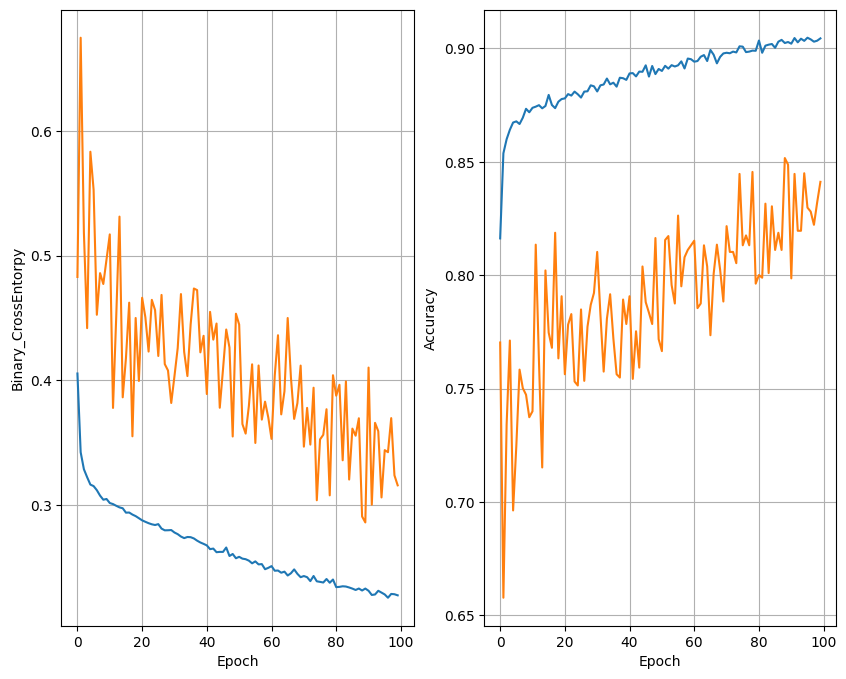

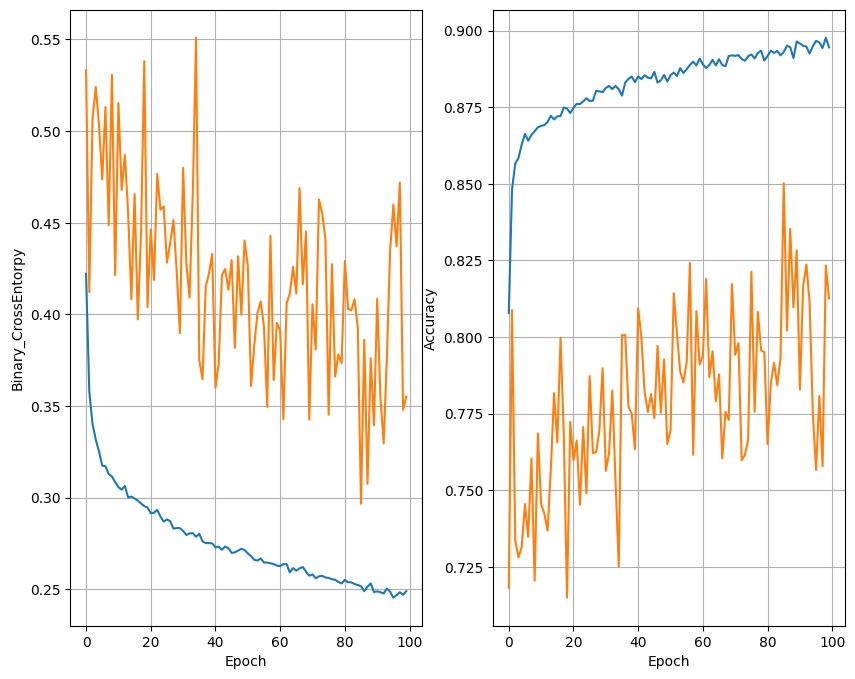

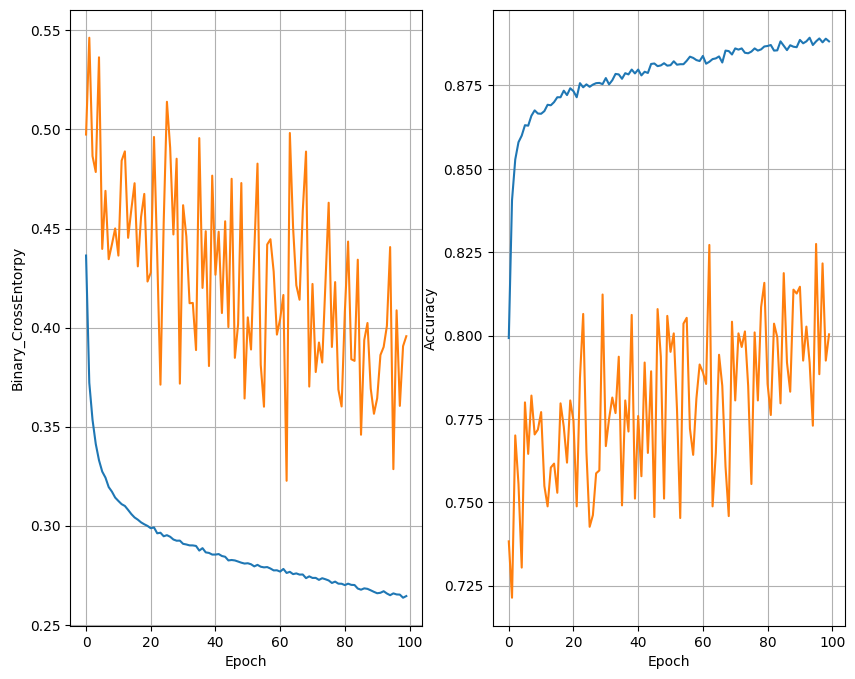

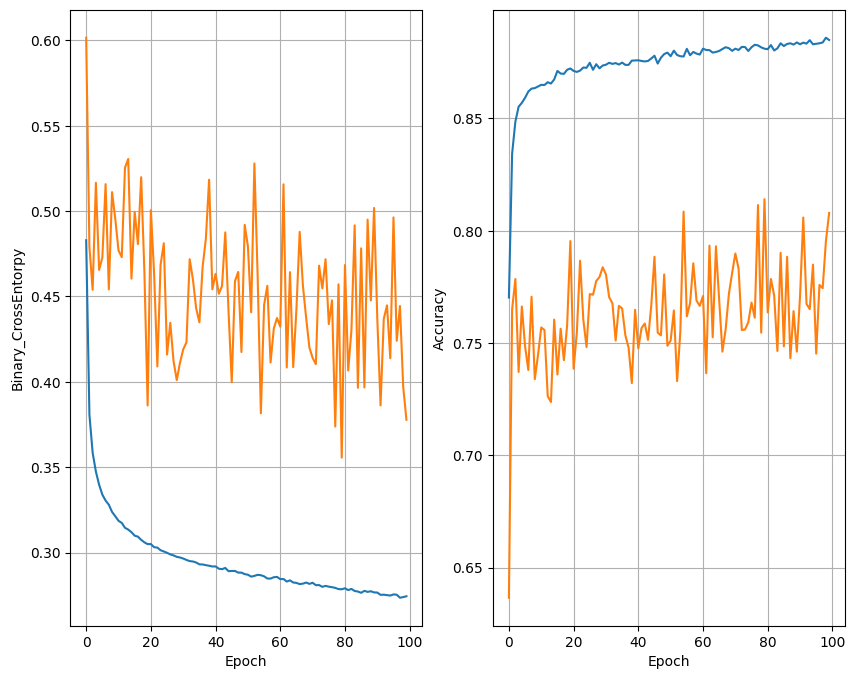

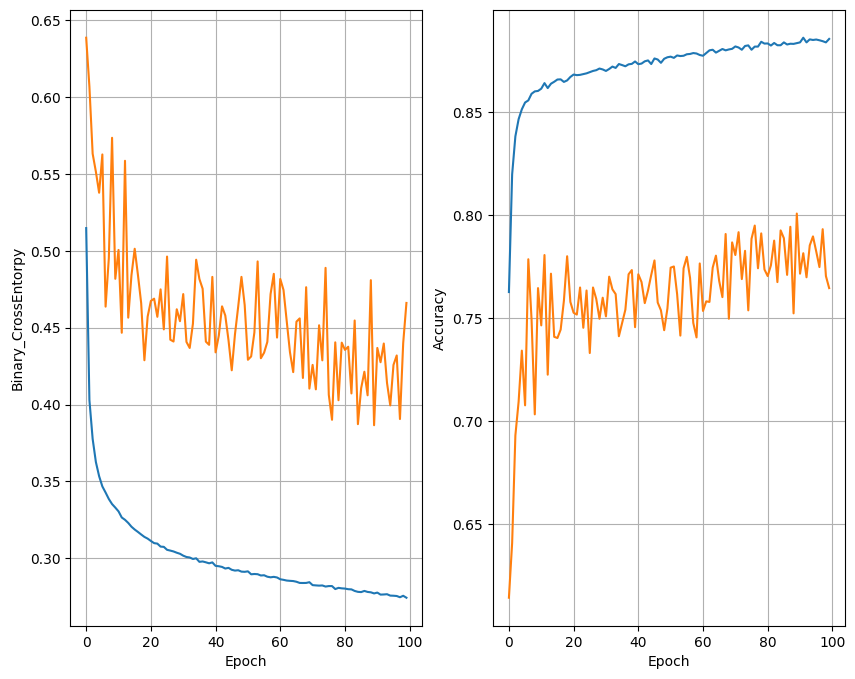

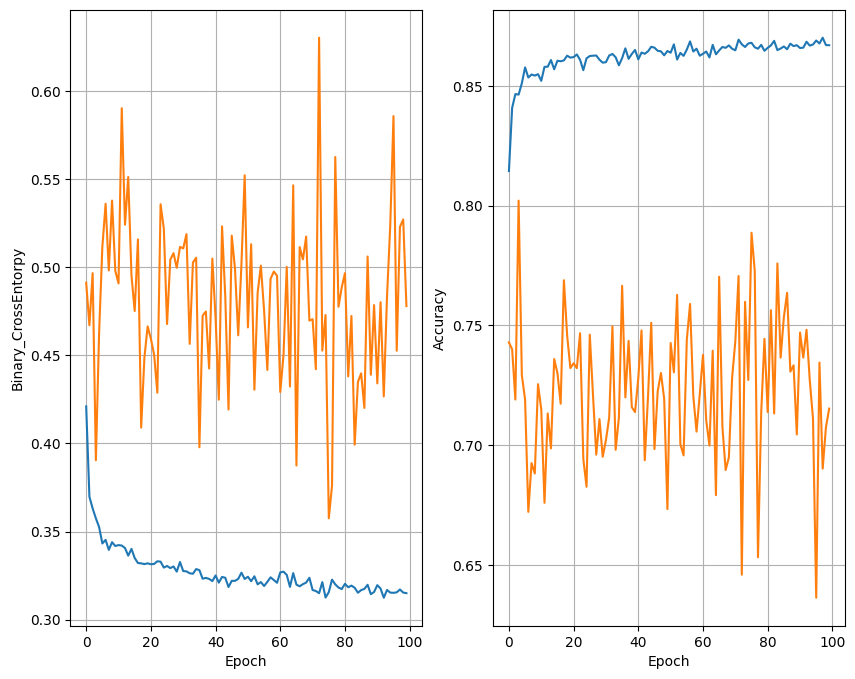

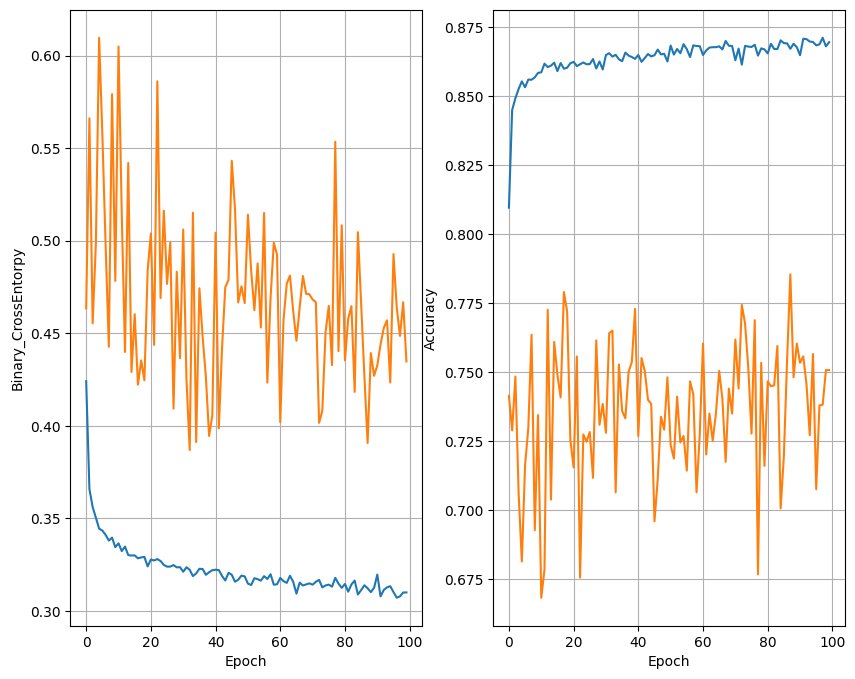

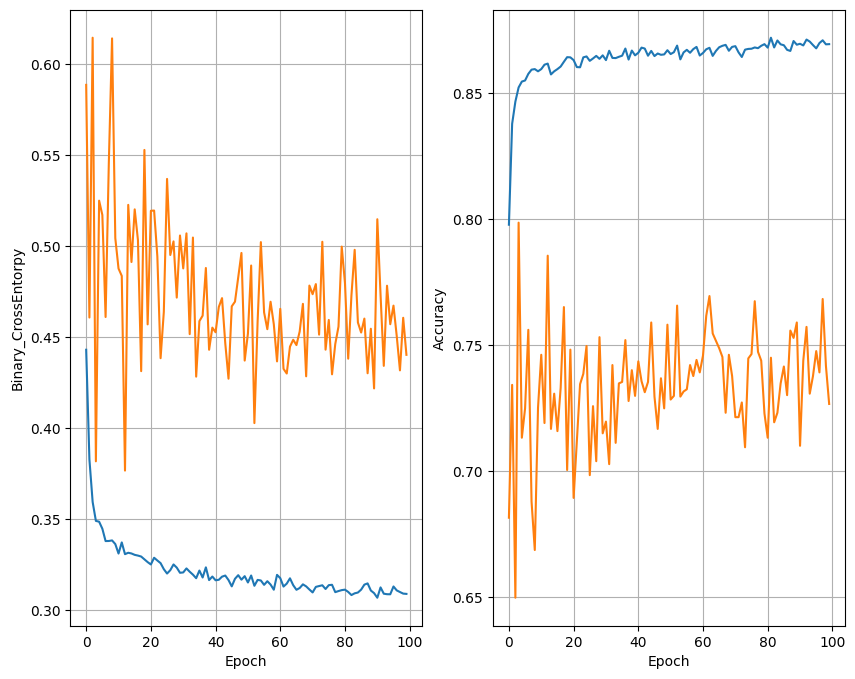

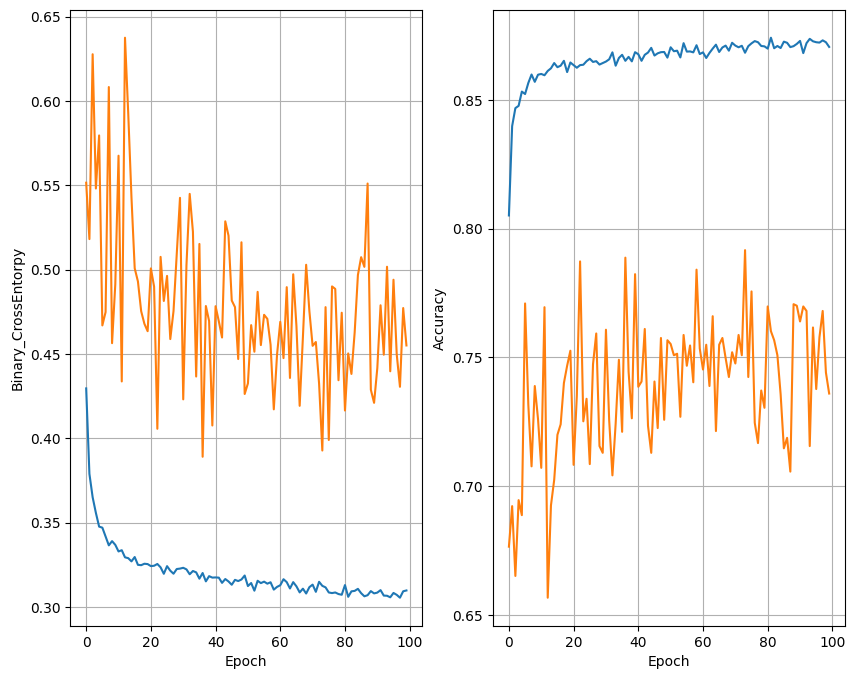

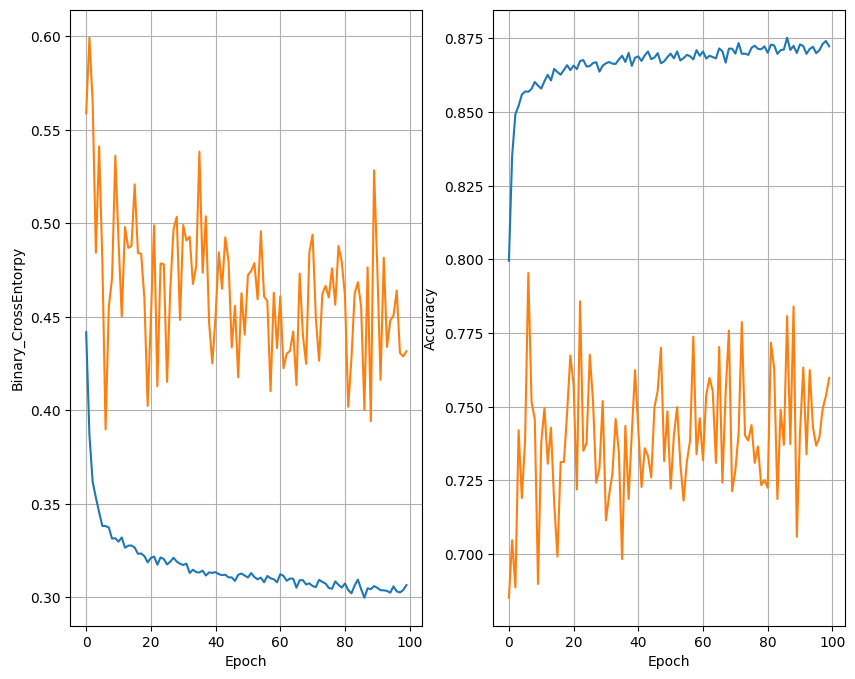

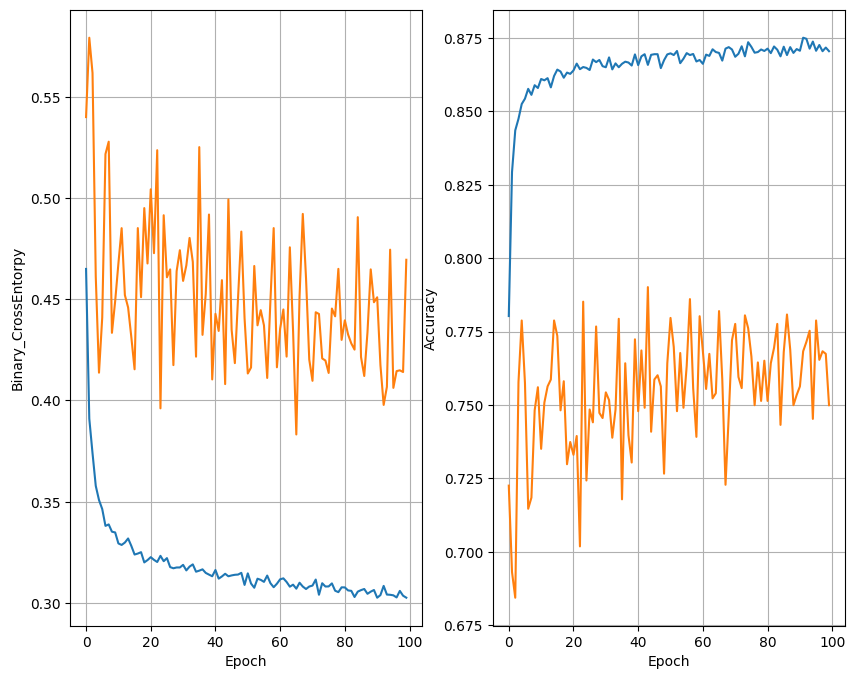

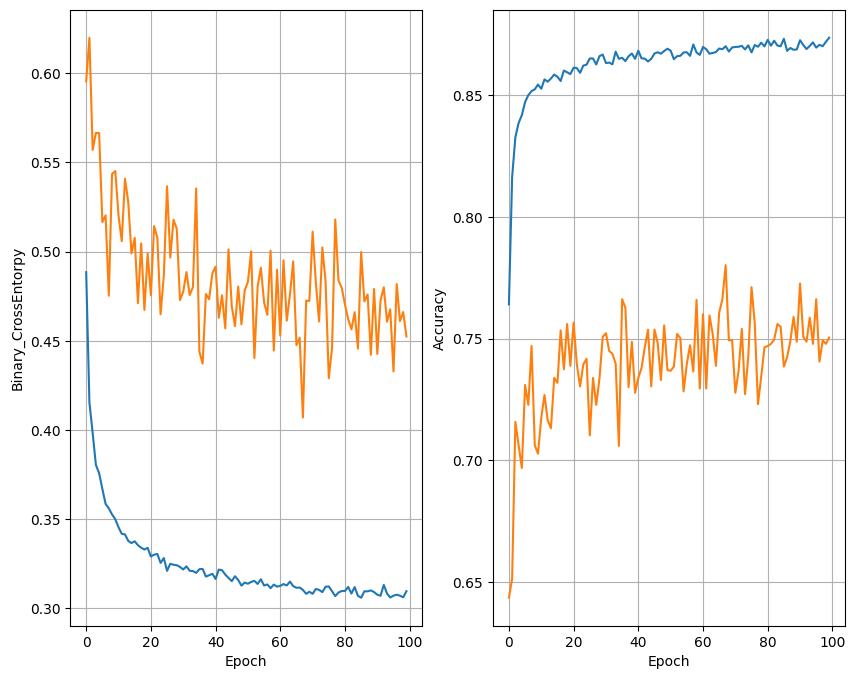

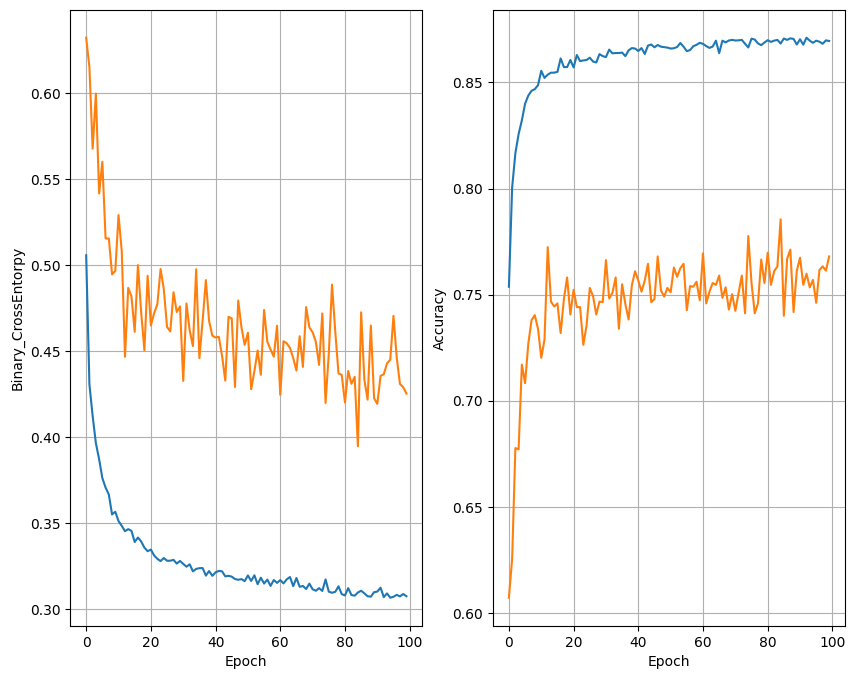

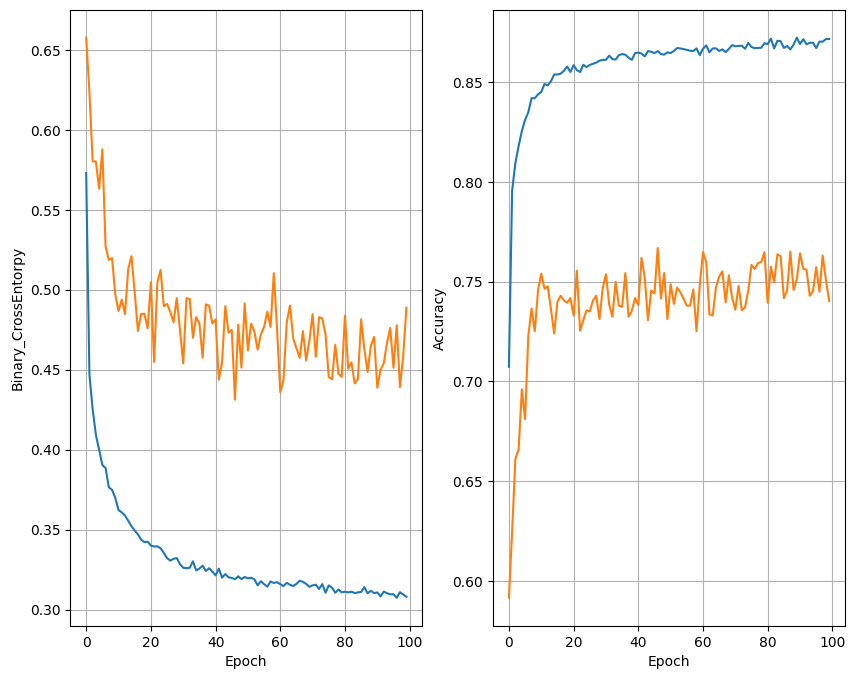

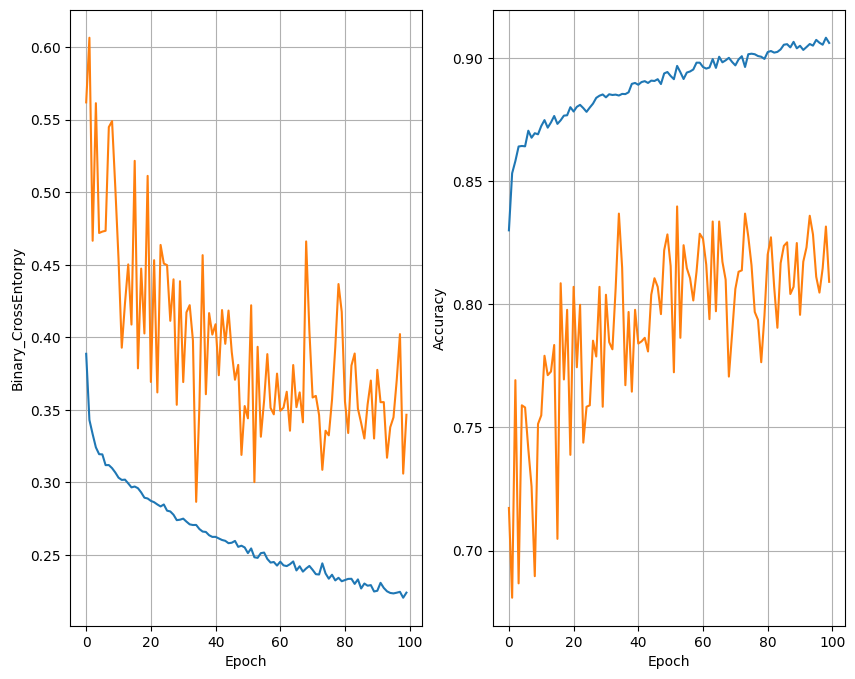

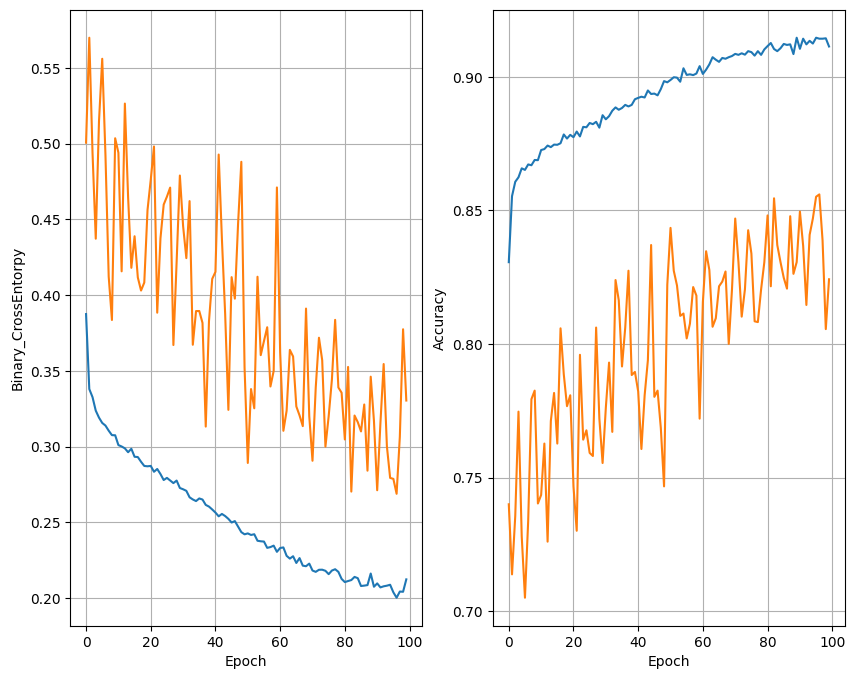

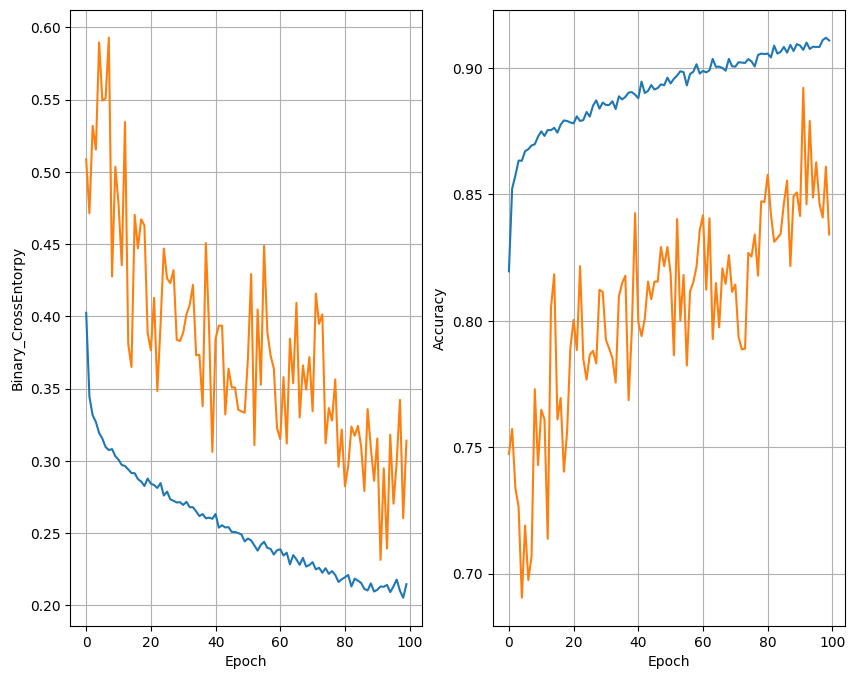

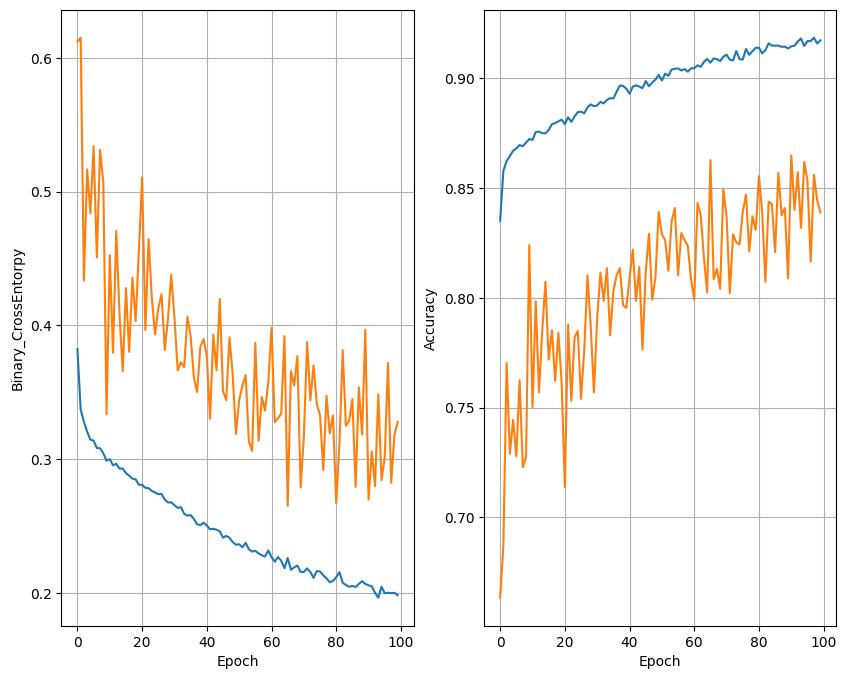

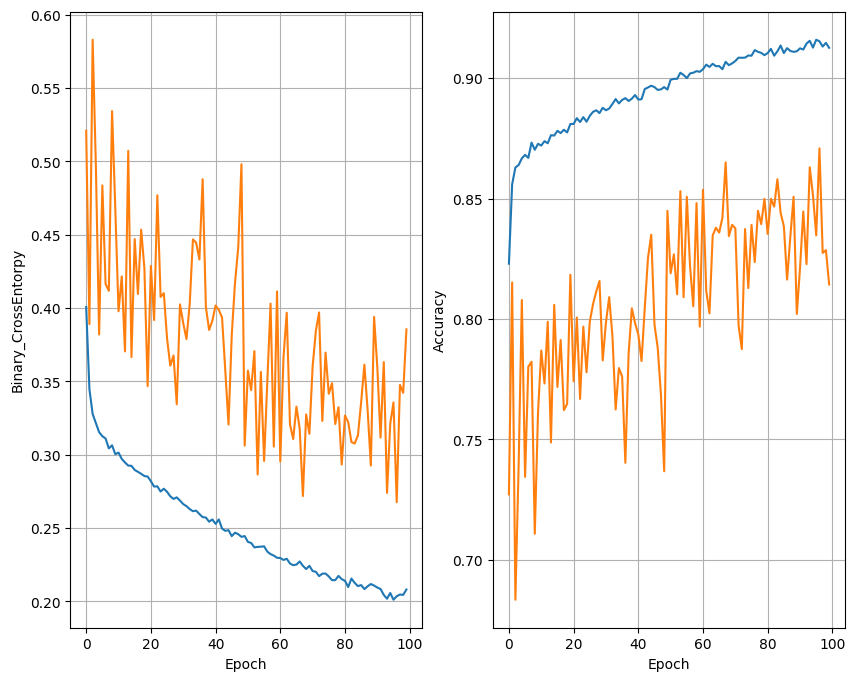

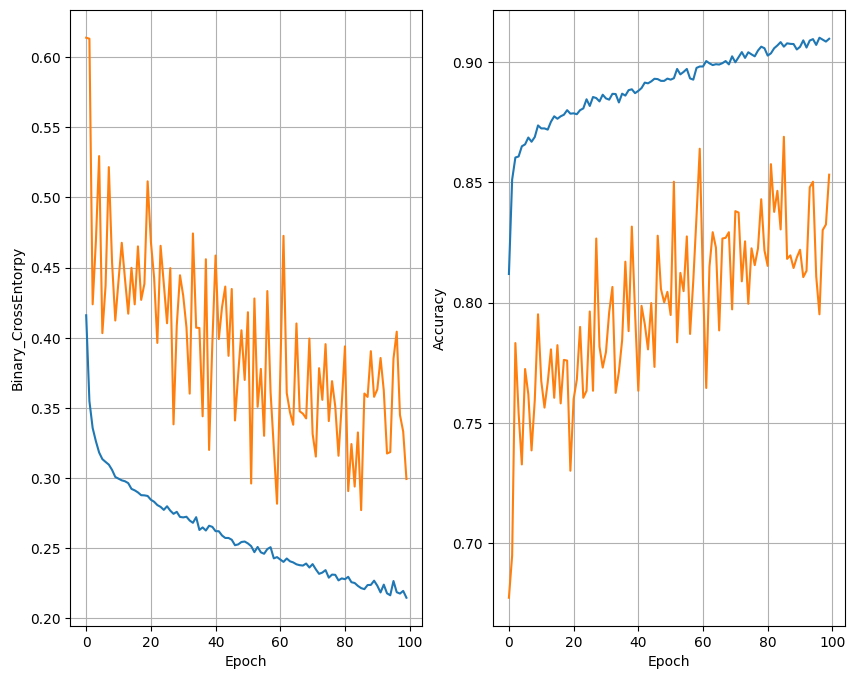

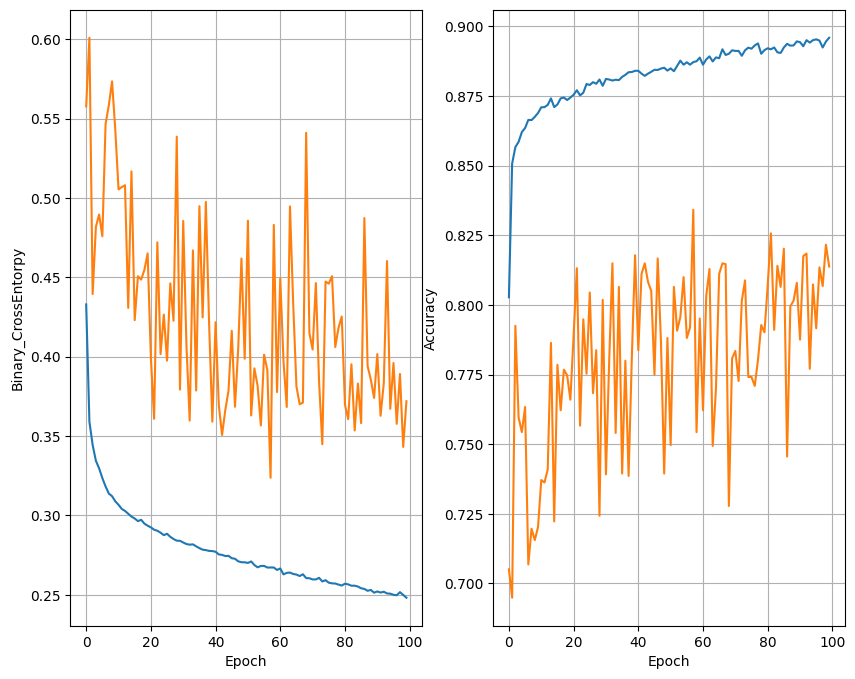

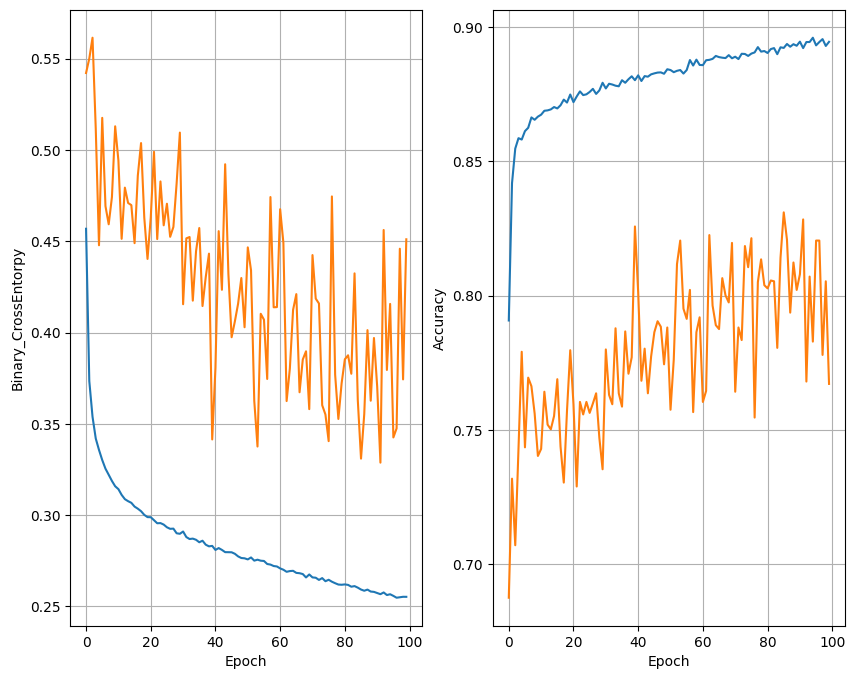

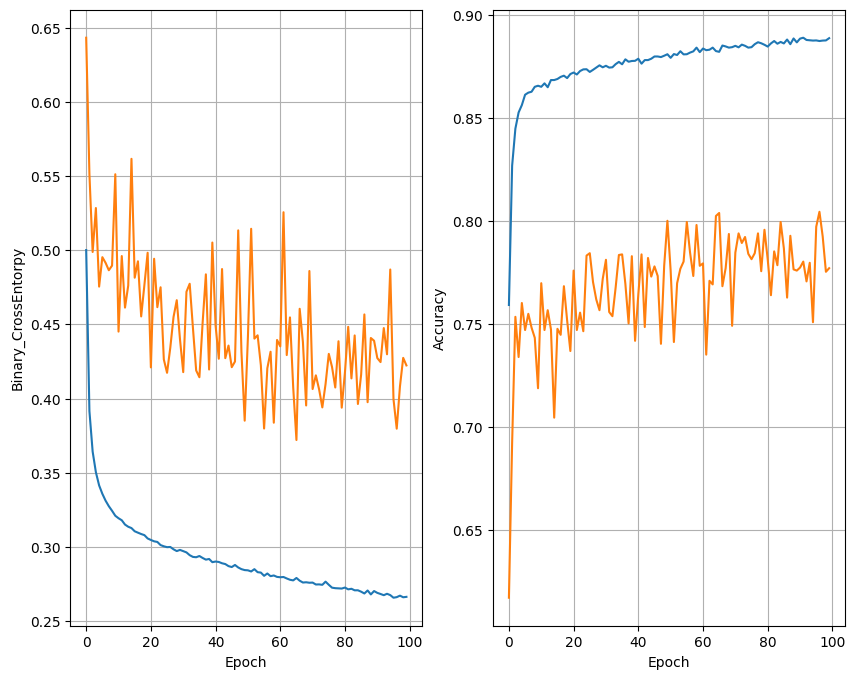

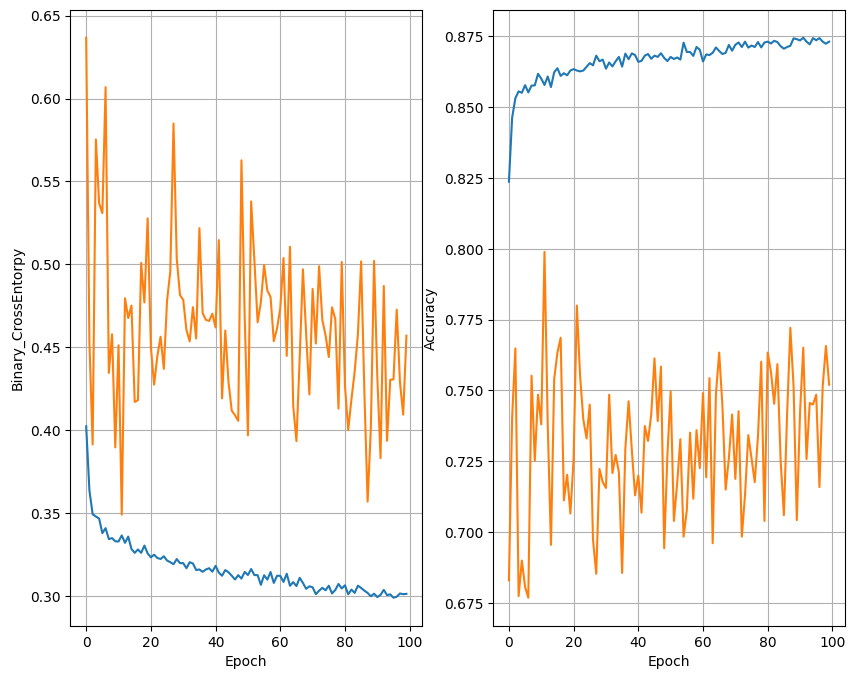

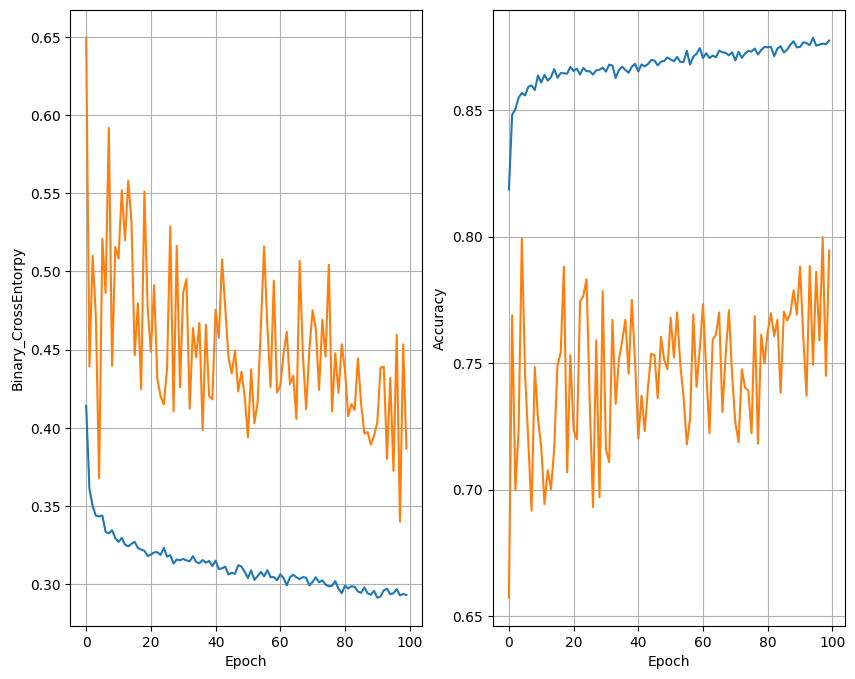

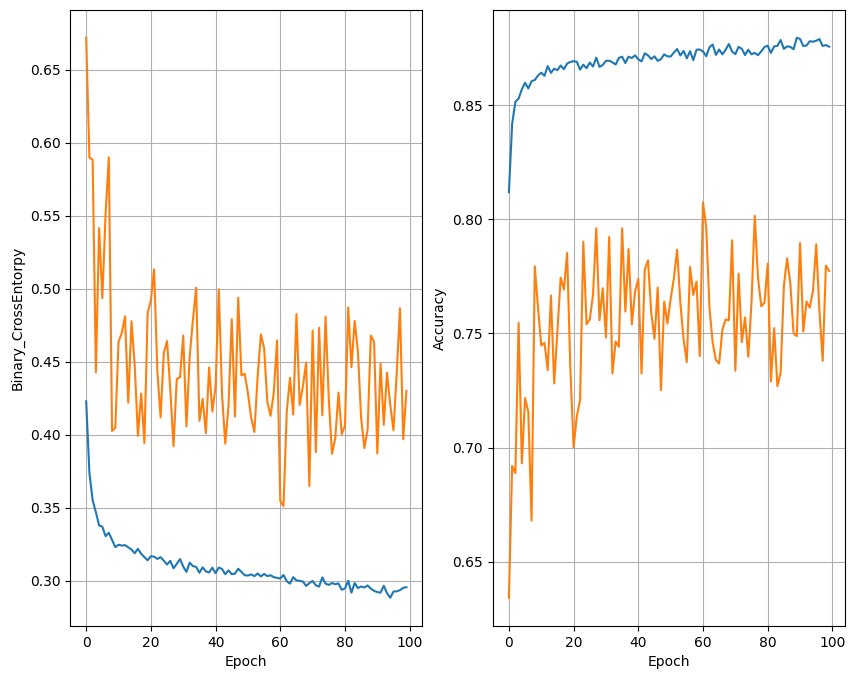

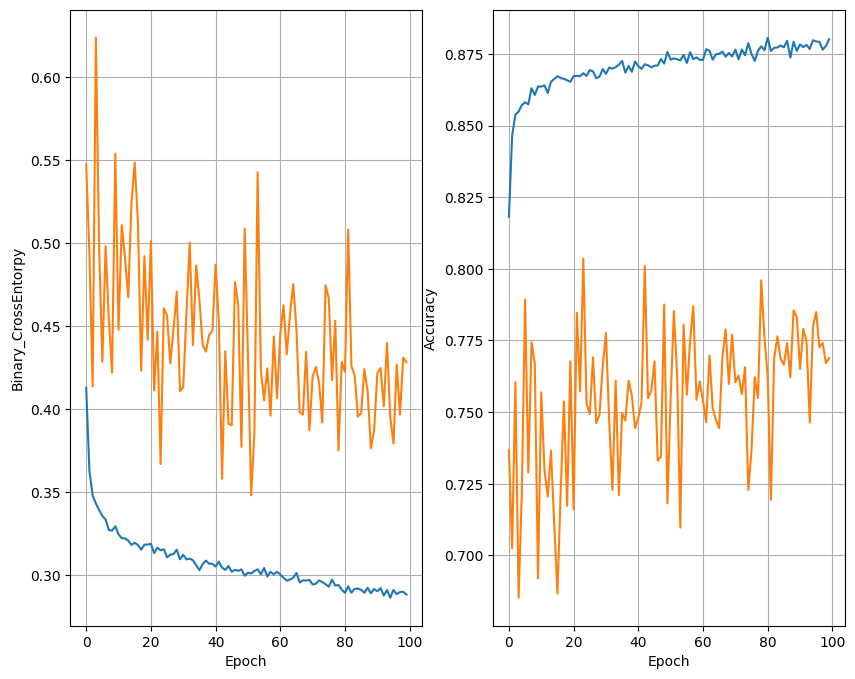

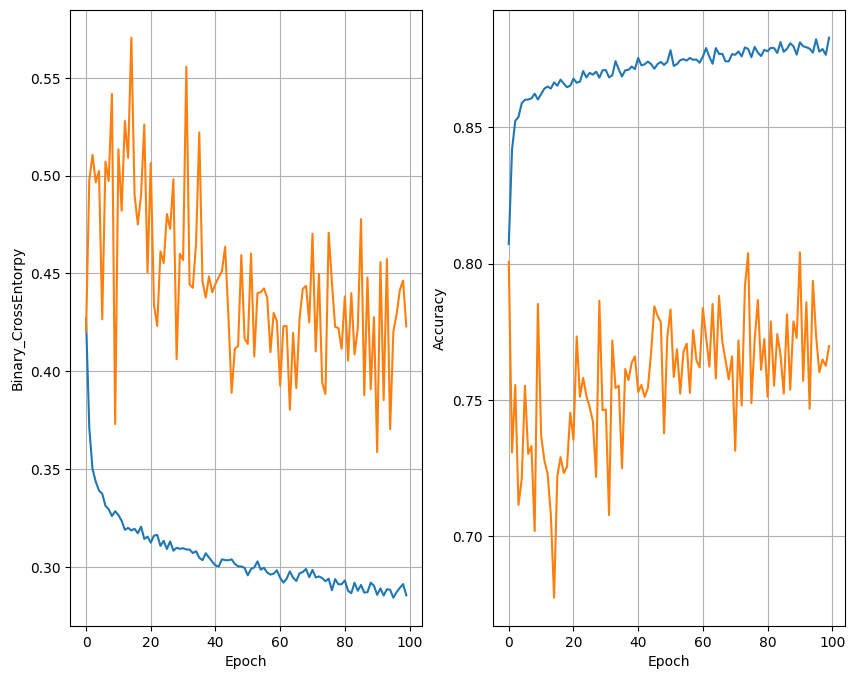

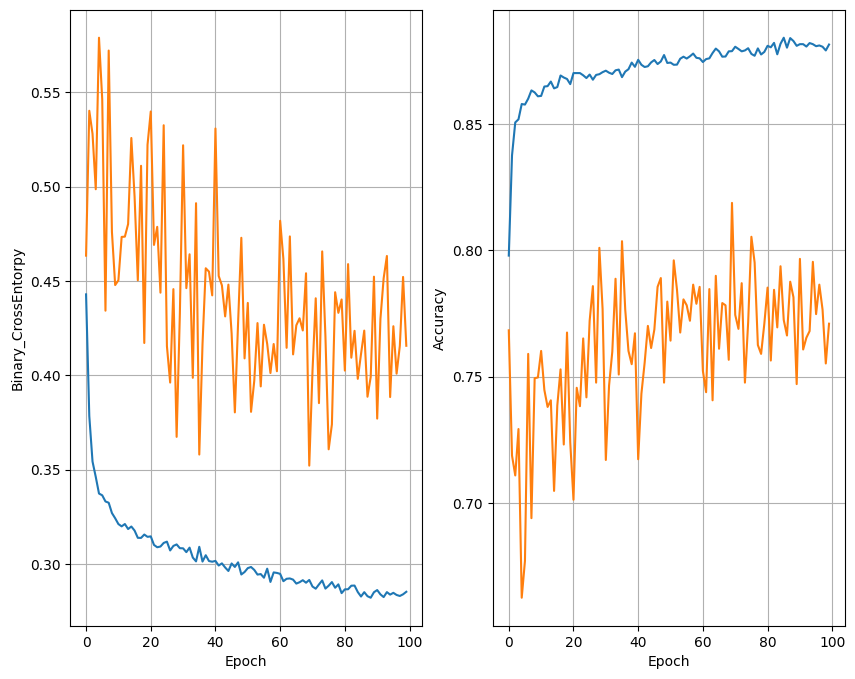

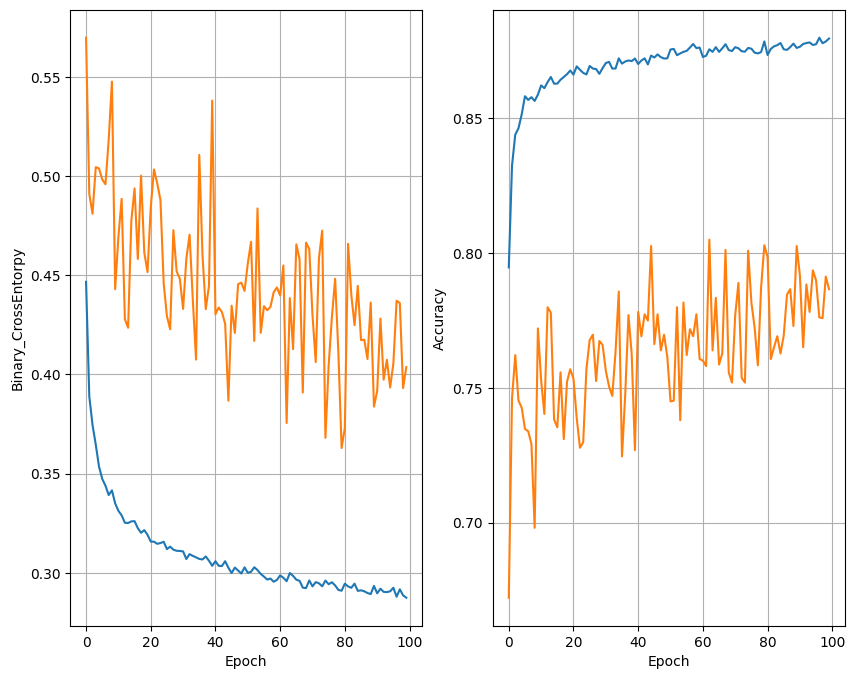

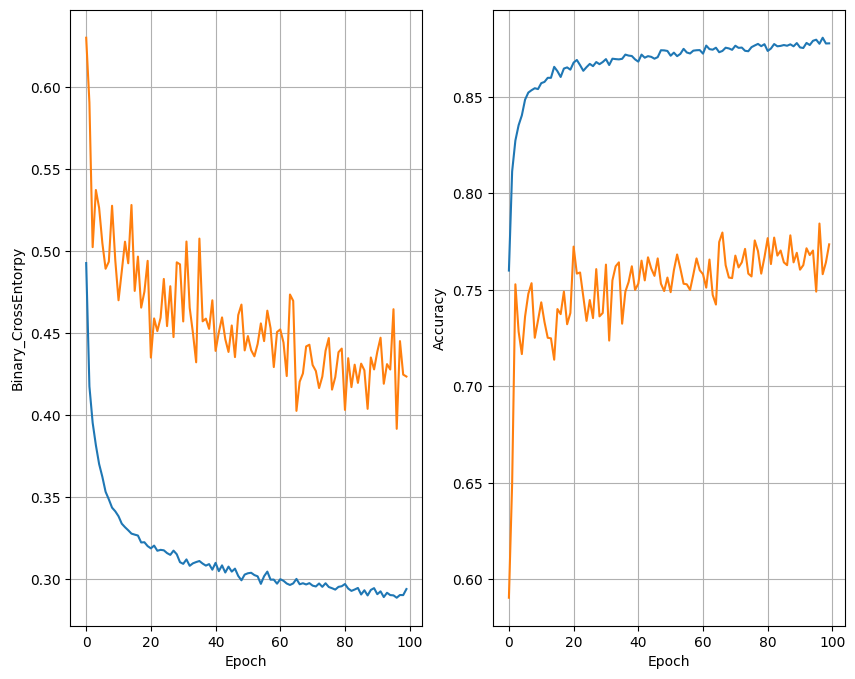

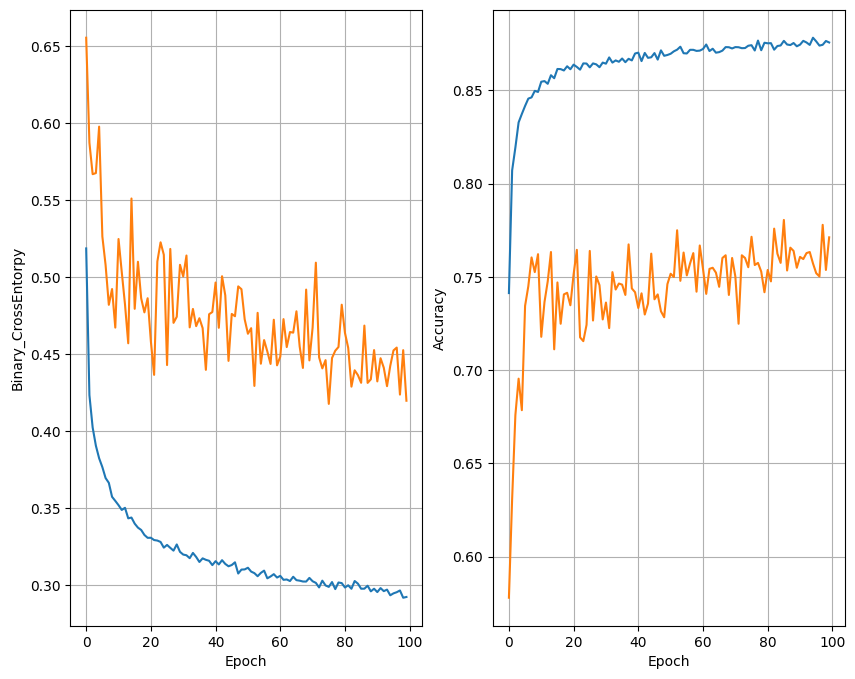

In [32]:
least_val_loss = float('inf')
least_loss_model = None
for num_nodes in [16,32,64]:
  for dropout_prob in [0,0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32,64,128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history = train_model(X_train,y_train,num_nodes,dropout_prob,lr,batch_size,100)
        plot_history(history)
        val_loss = model.evaluate(X_valid,y_valid)[0]
        if val_loss<least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model




In [34]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred>0.5).astype(int).reshape(-1,)

90/90 [==============================] - 0s 3ms/step


In [35]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       980
           1       0.91      0.90      0.90      1873

    accuracy                           0.87      2853
   macro avg       0.86      0.86      0.86      2853
weighted avg       0.88      0.87      0.88      2853

